Afficher la première simulation

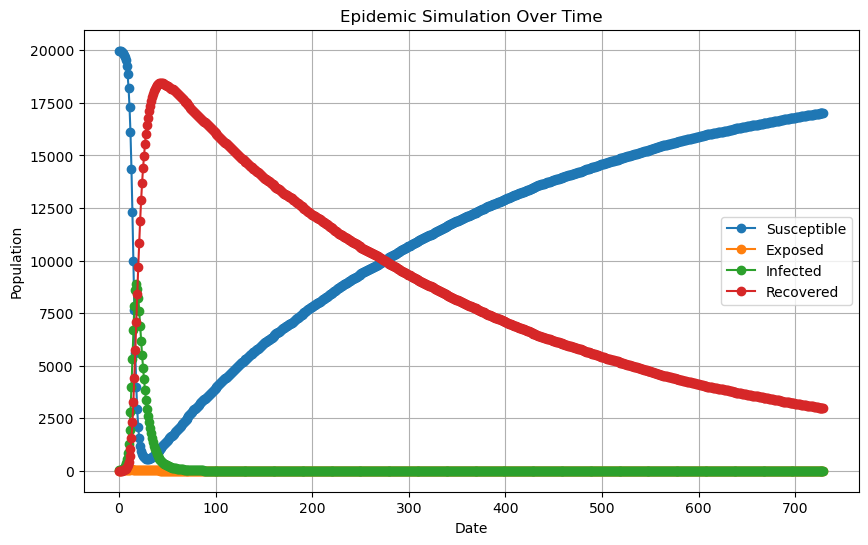

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../resultat/11_octobre_contamination&deplacer/resultat_1.csv', delimiter=';')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Susceptible'], label='Susceptible', marker='o')
plt.plot(data.index, data['Exposed'], label='Exposed', marker='o')
plt.plot(data.index, data['Infected'], label='Infected', marker='o')
plt.plot(data.index, data['Recovered'], label='Recovered', marker='o')

# Customize the plot
plt.title('Epidemic Simulation Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


Afficher les 100 simulations

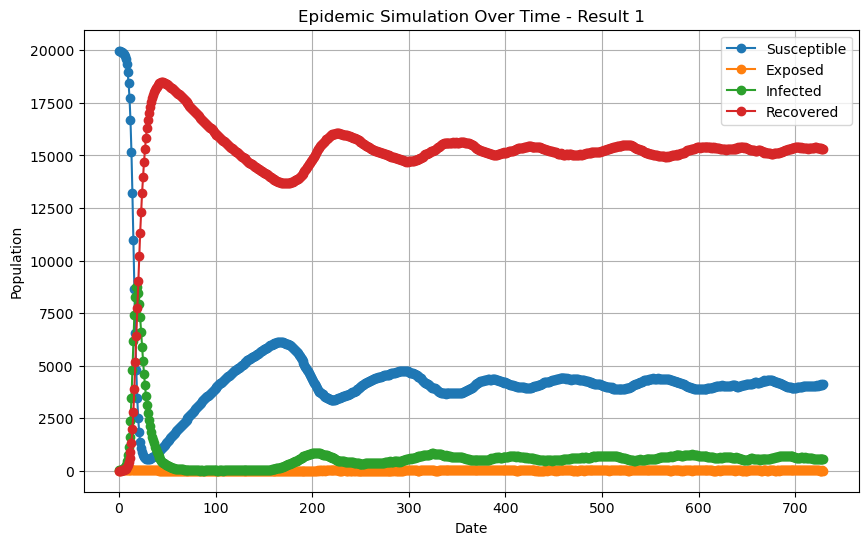

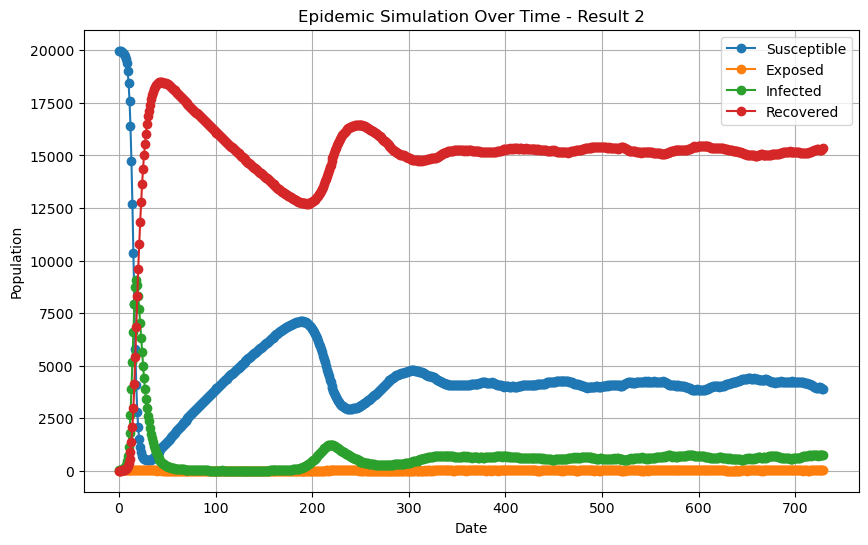

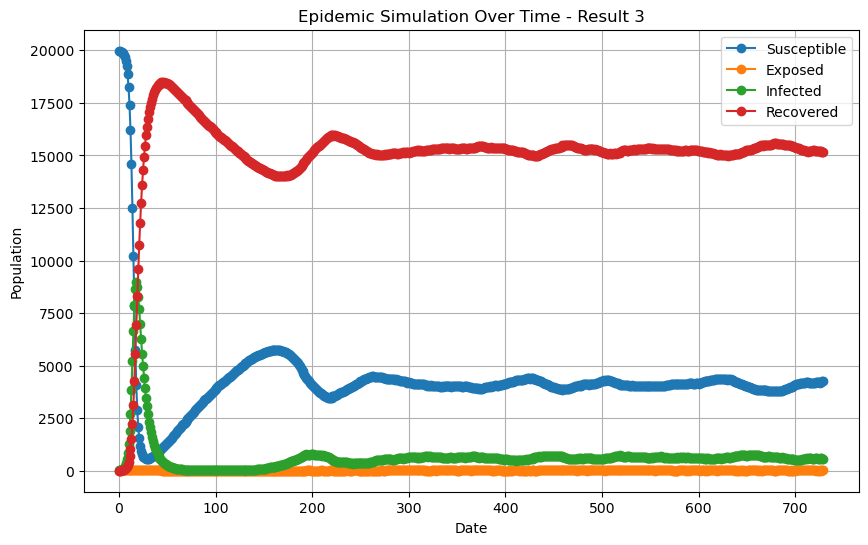

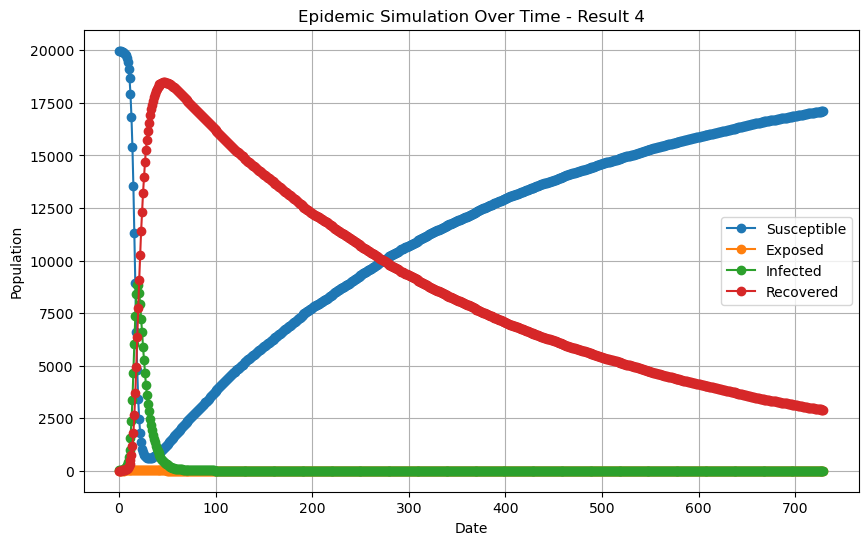

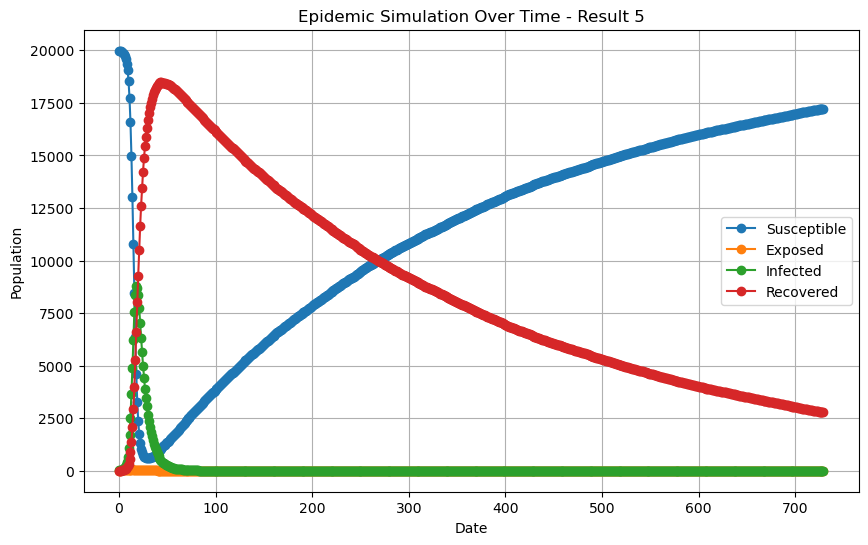

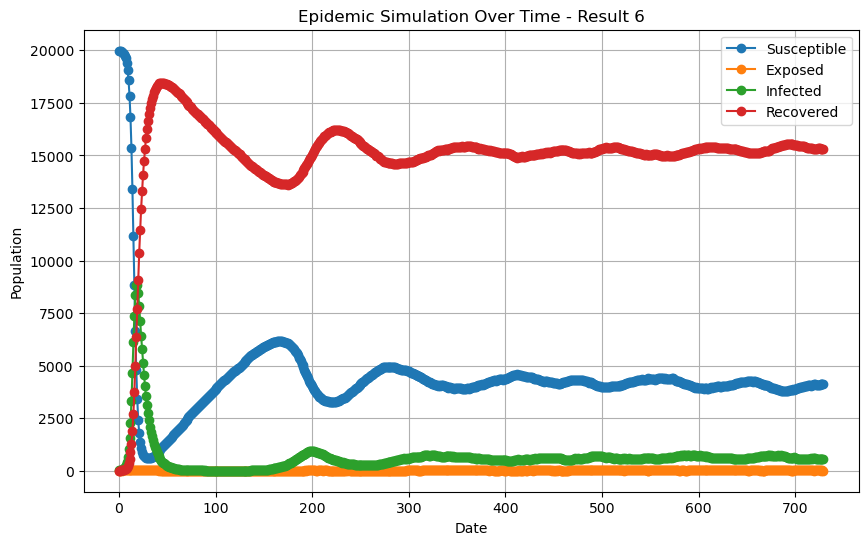

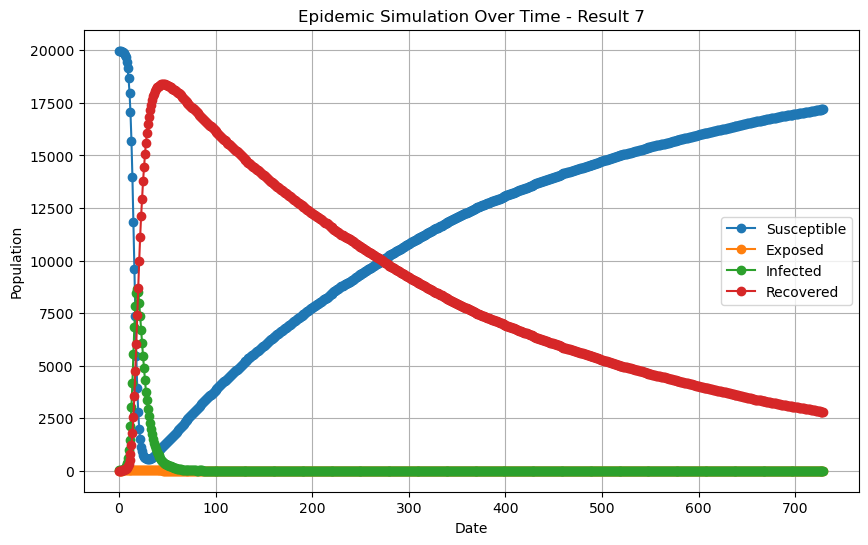

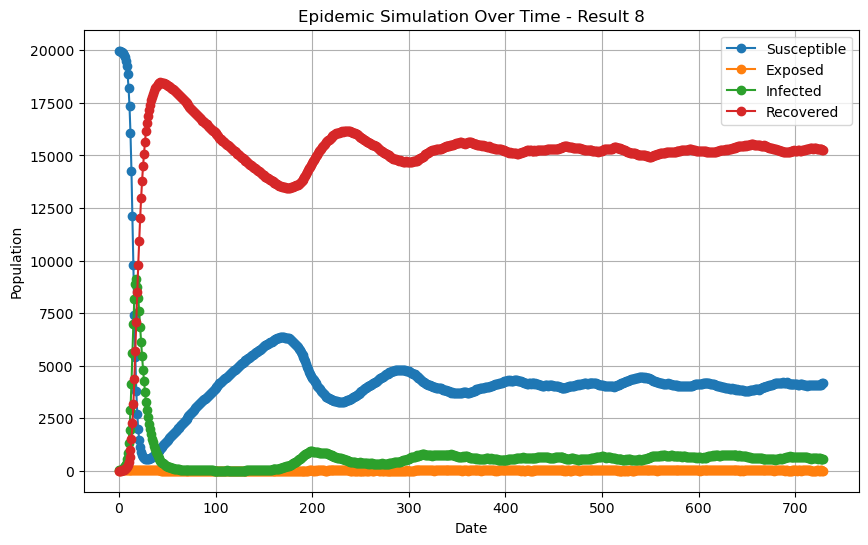

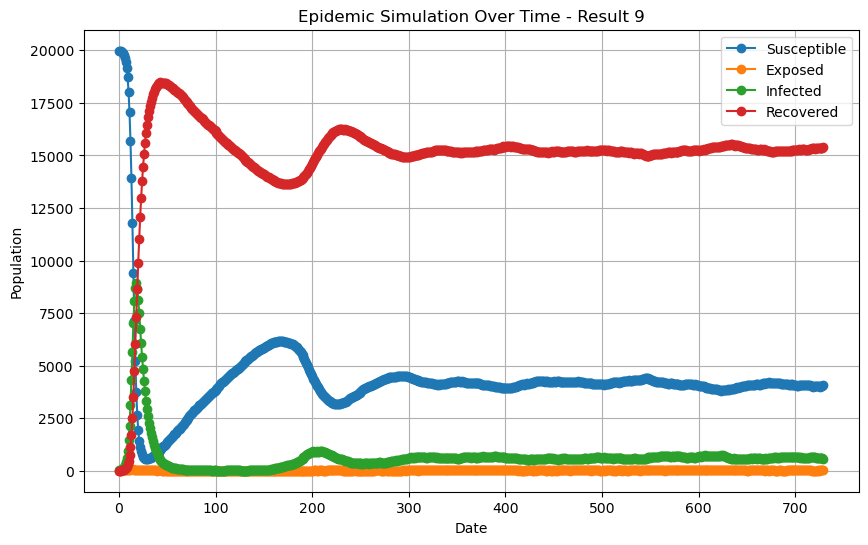

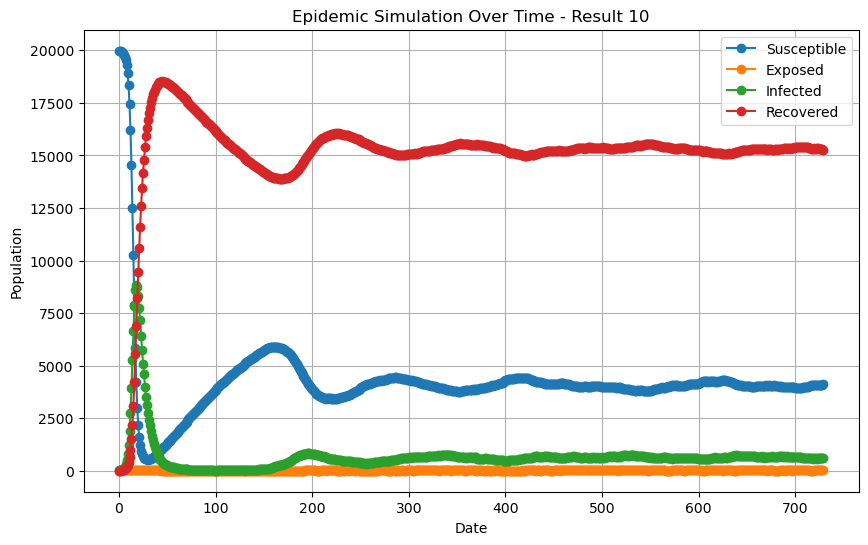

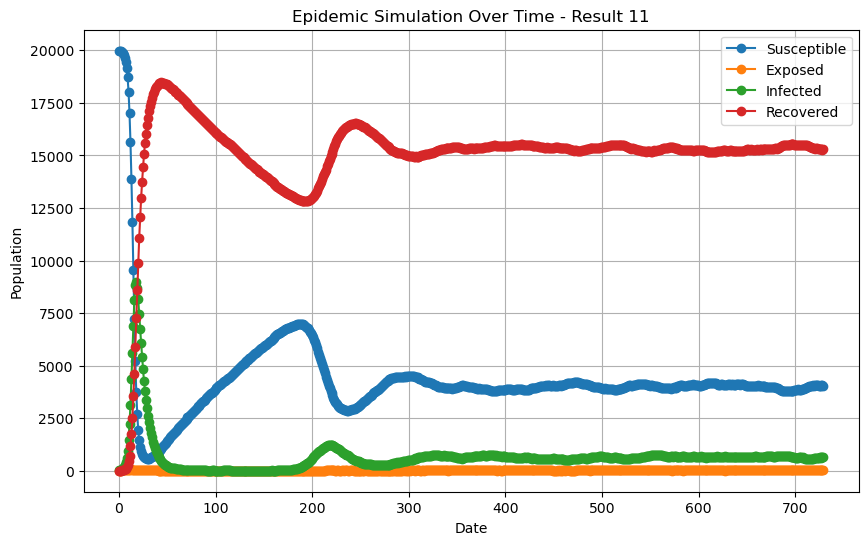

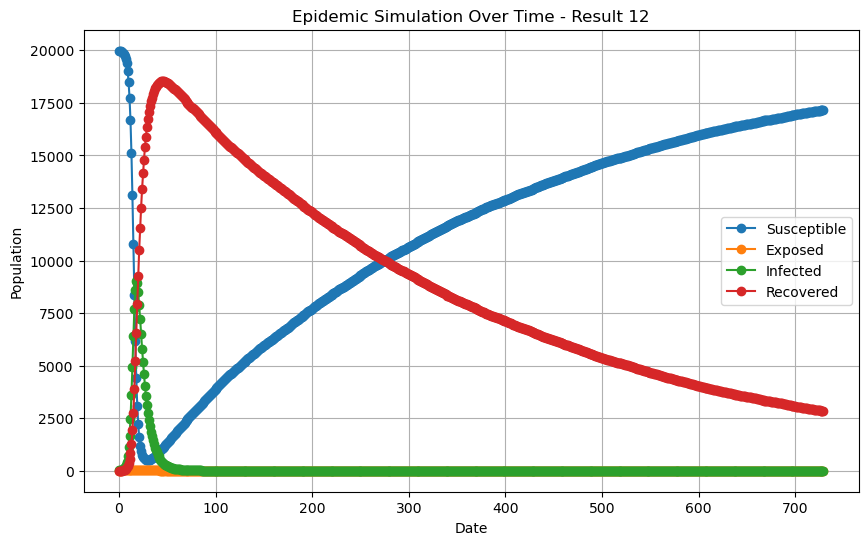

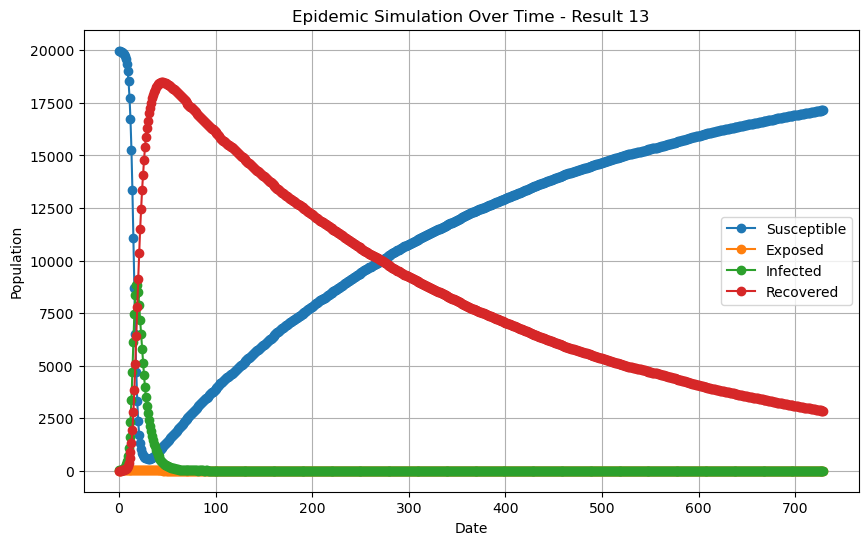

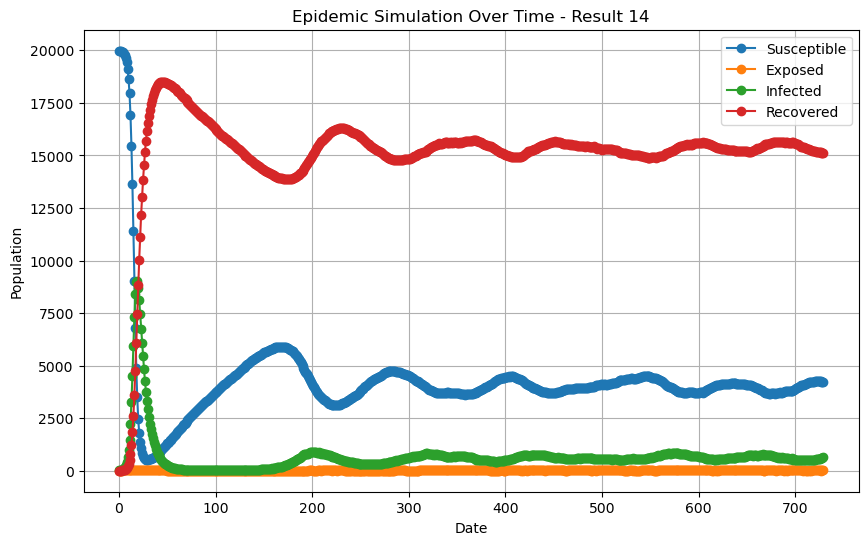

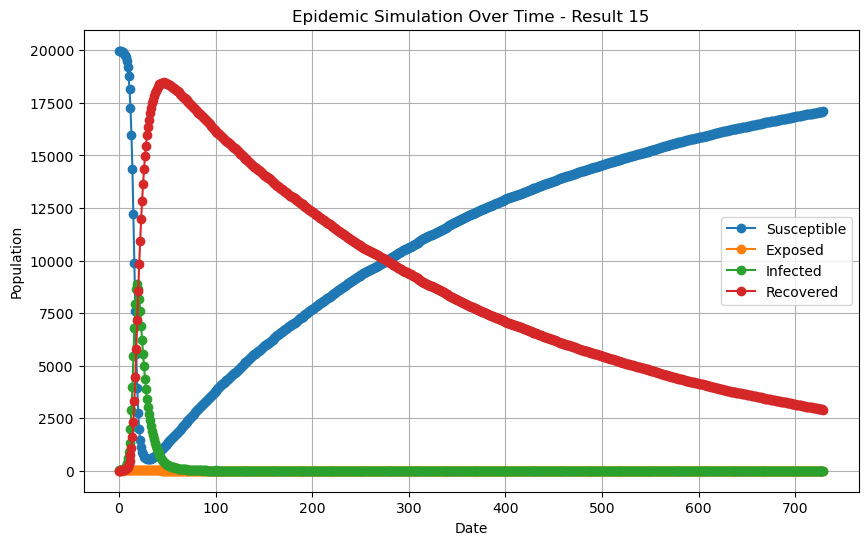

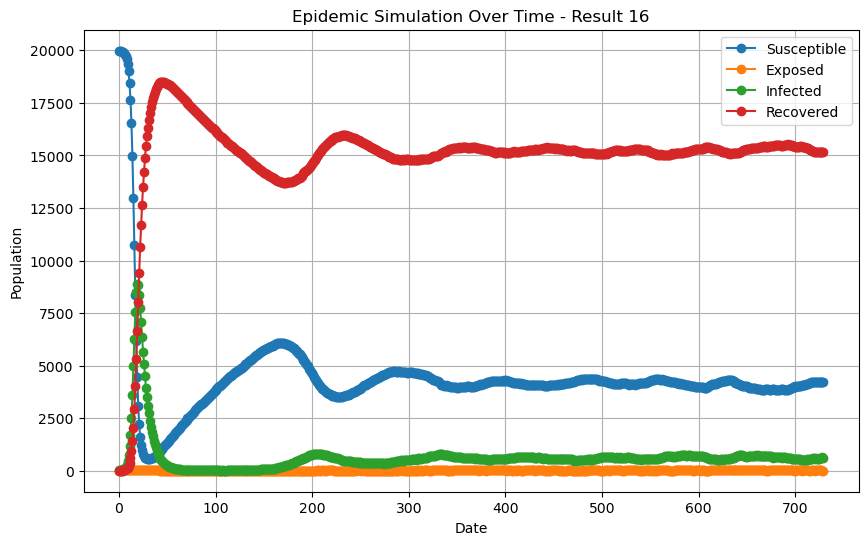

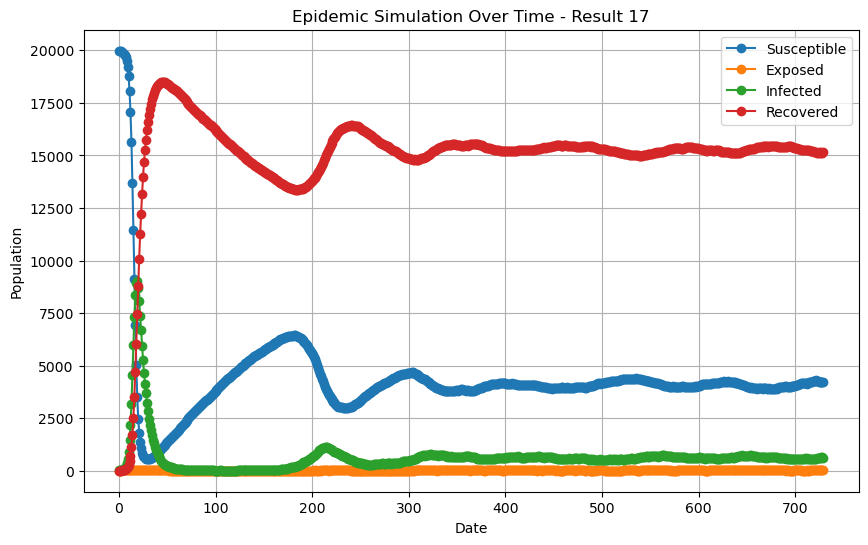

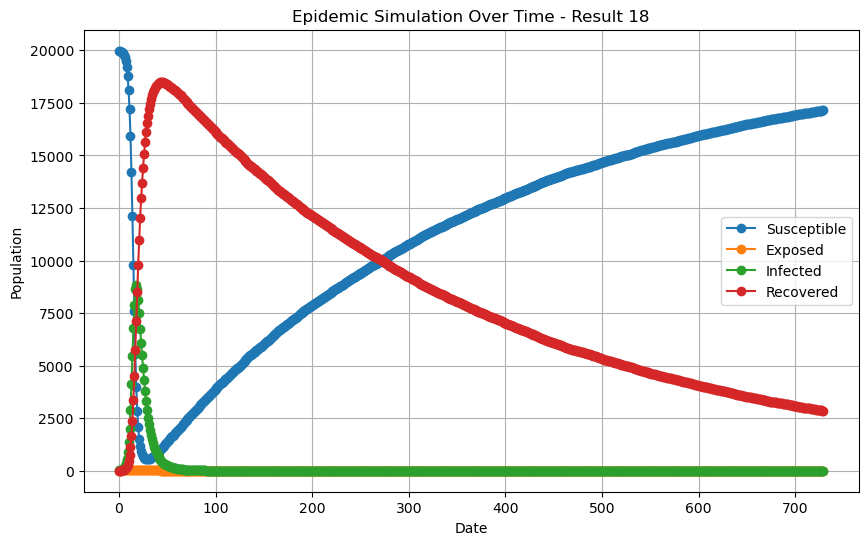

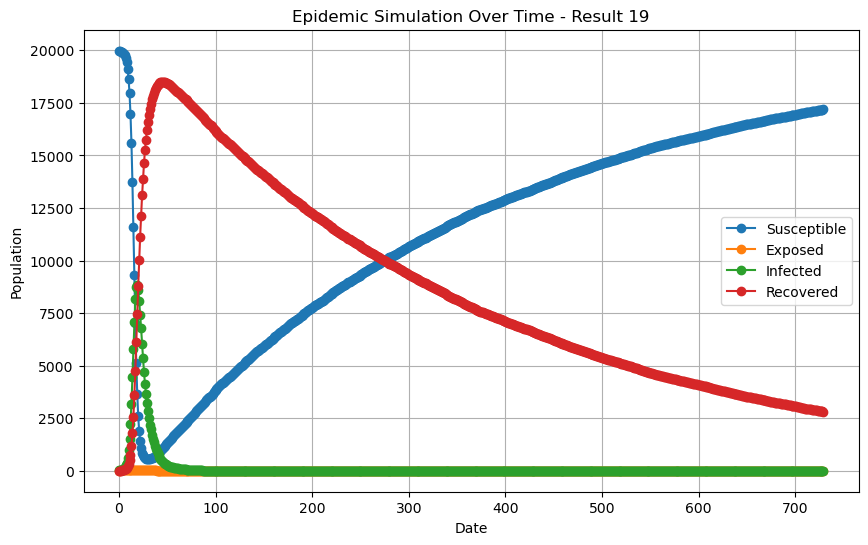

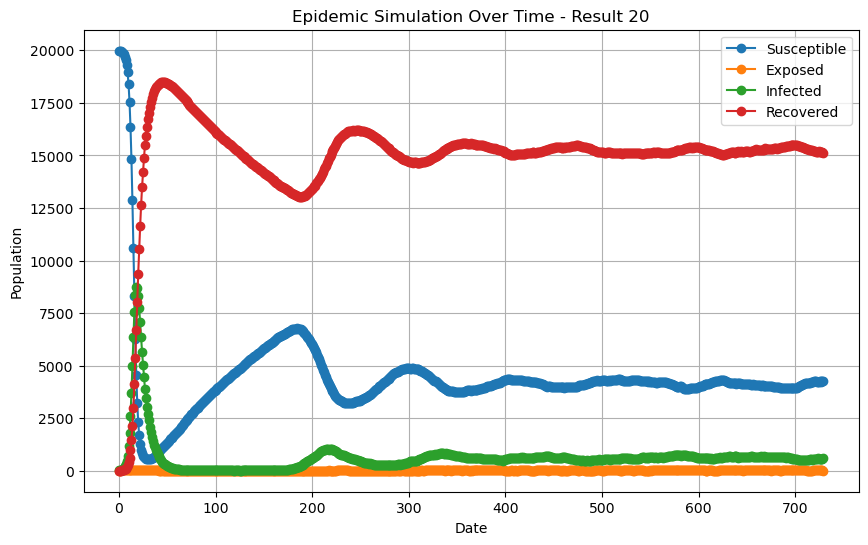

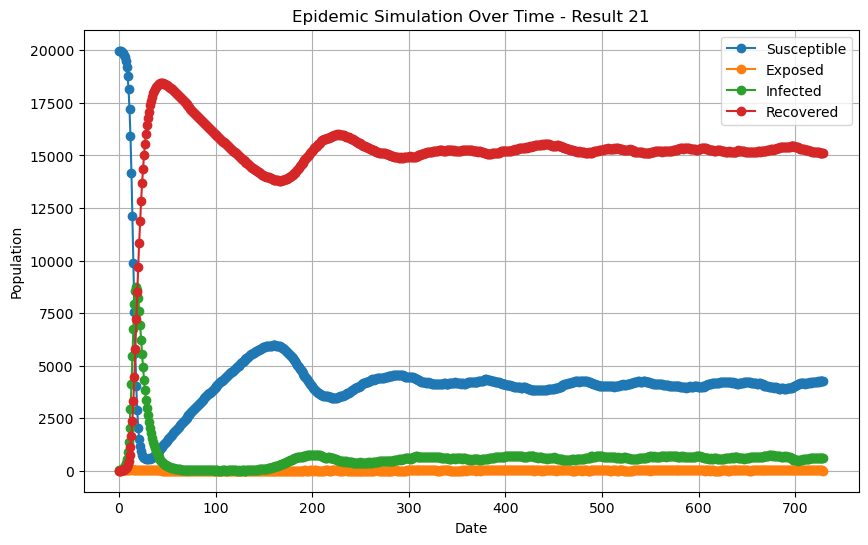

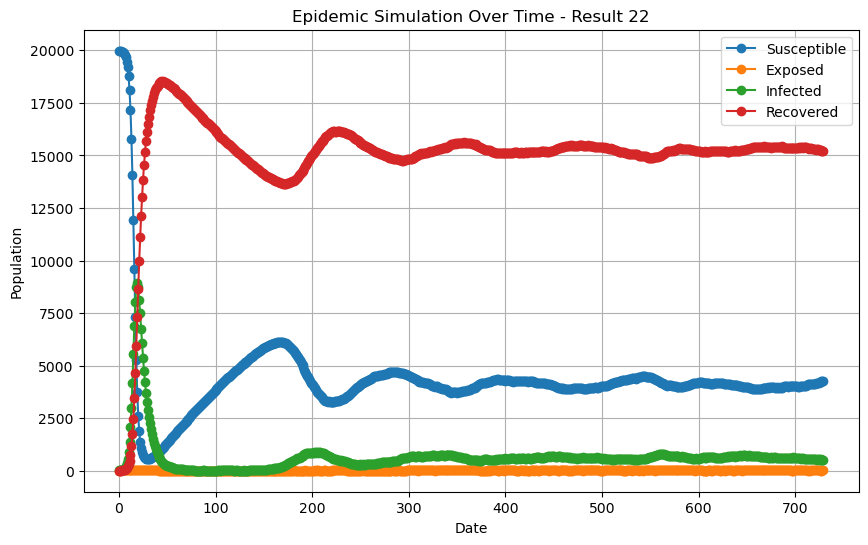

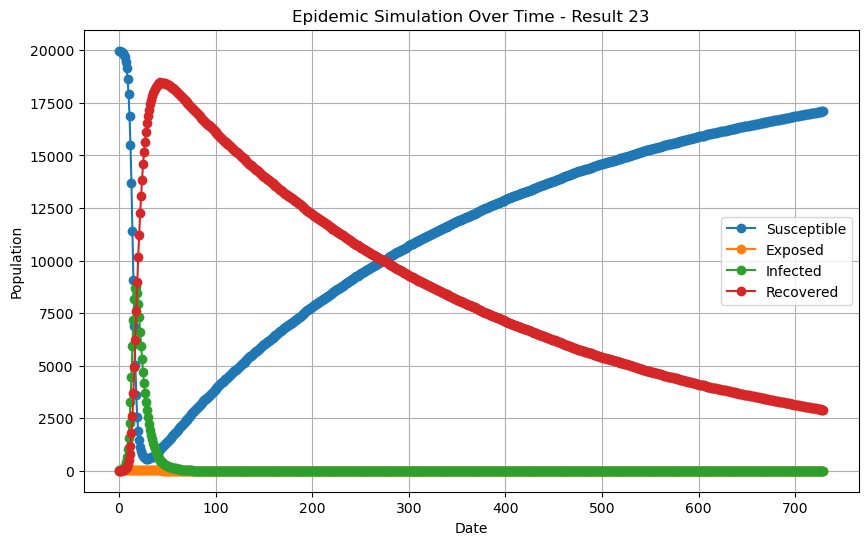

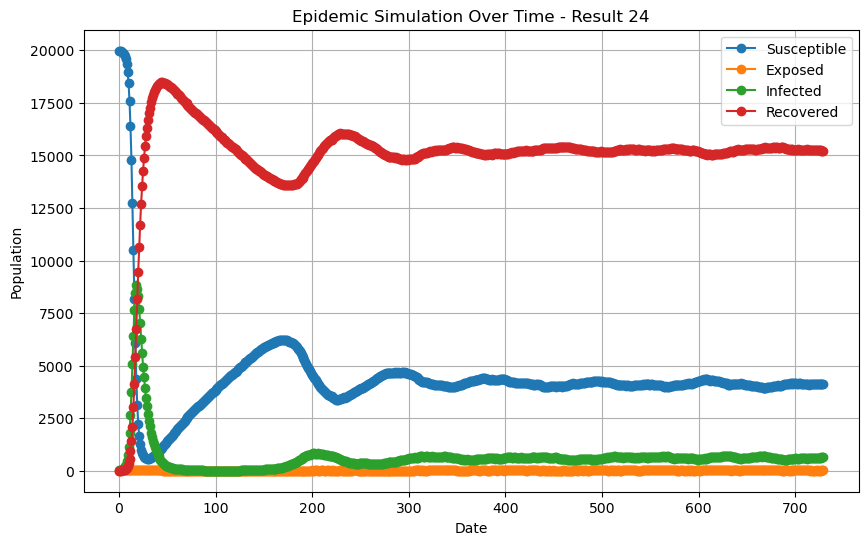

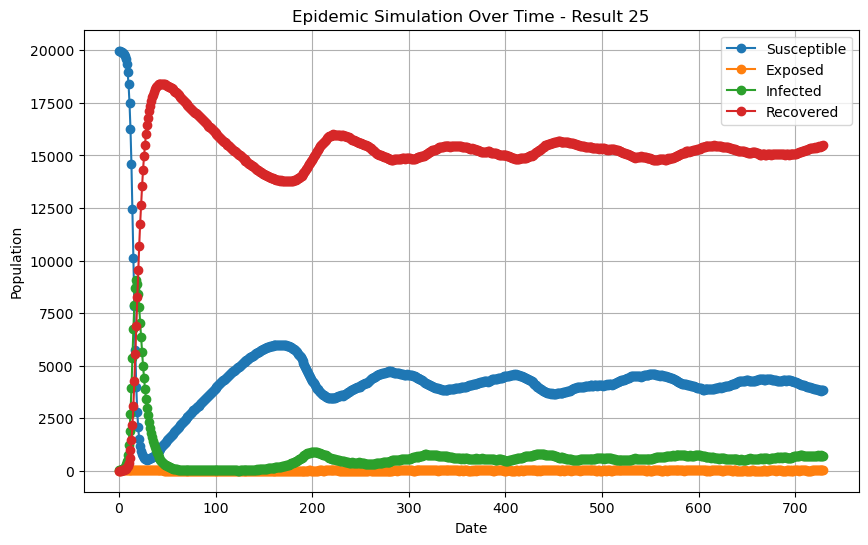

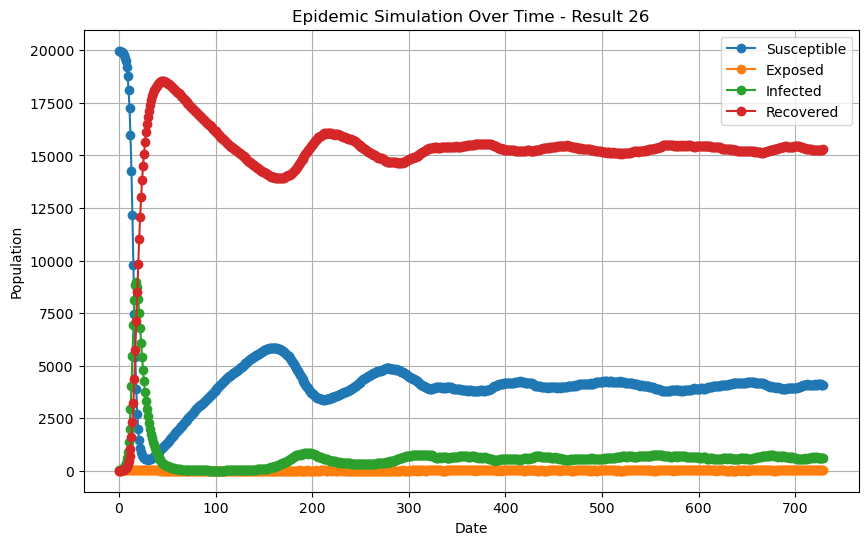

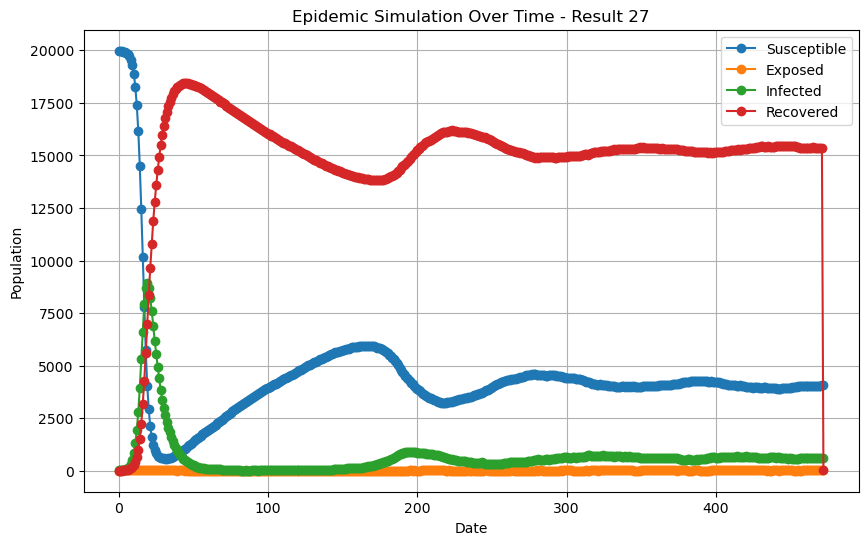

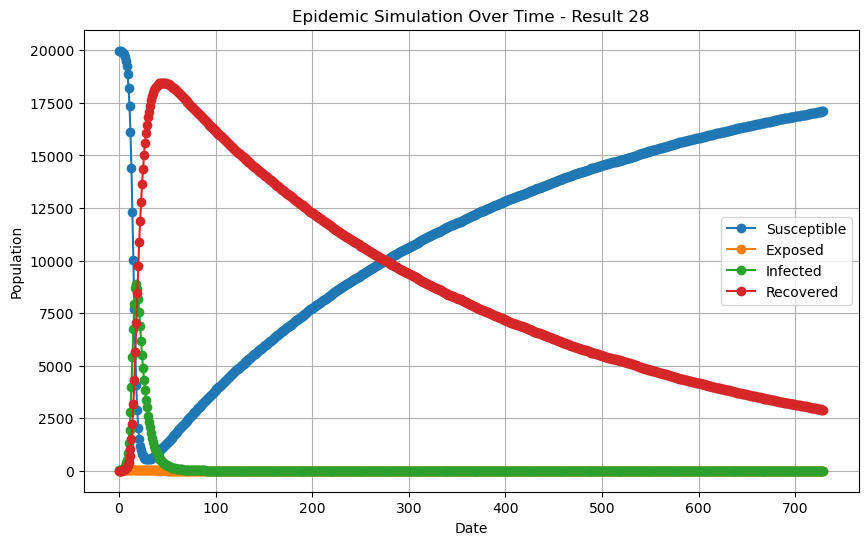

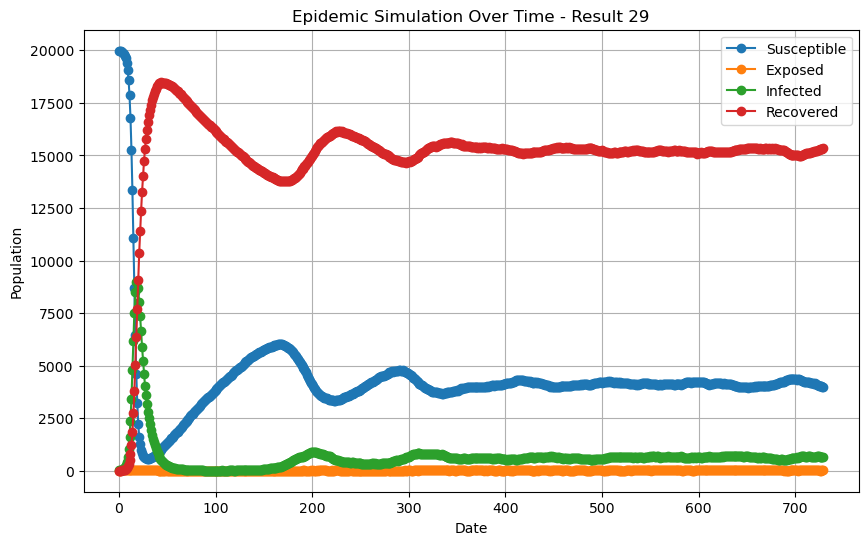

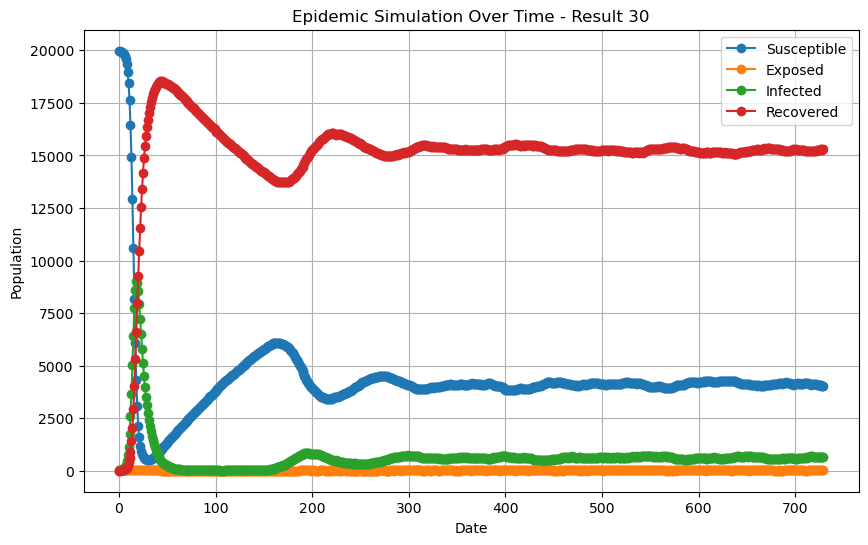

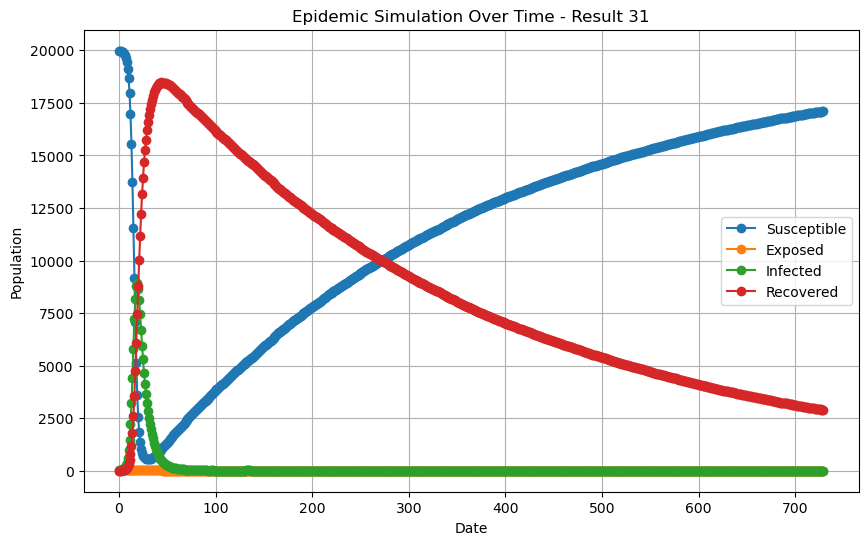

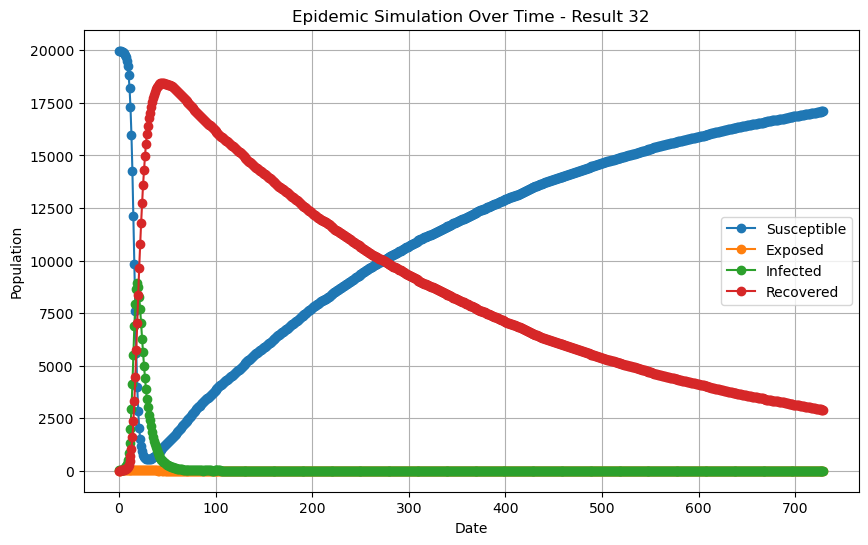

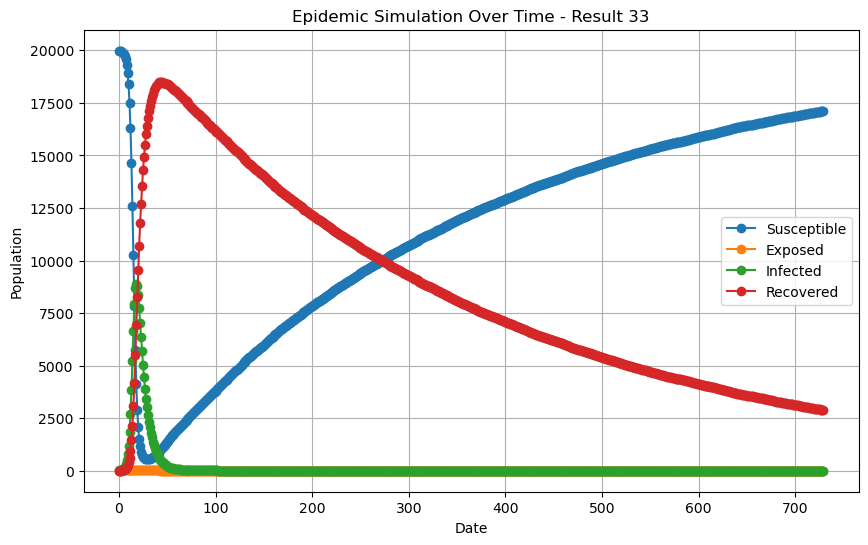

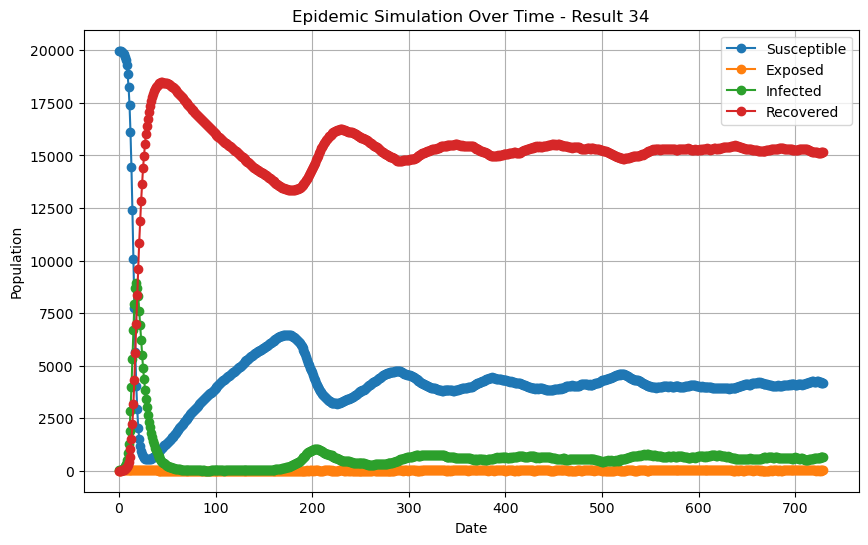

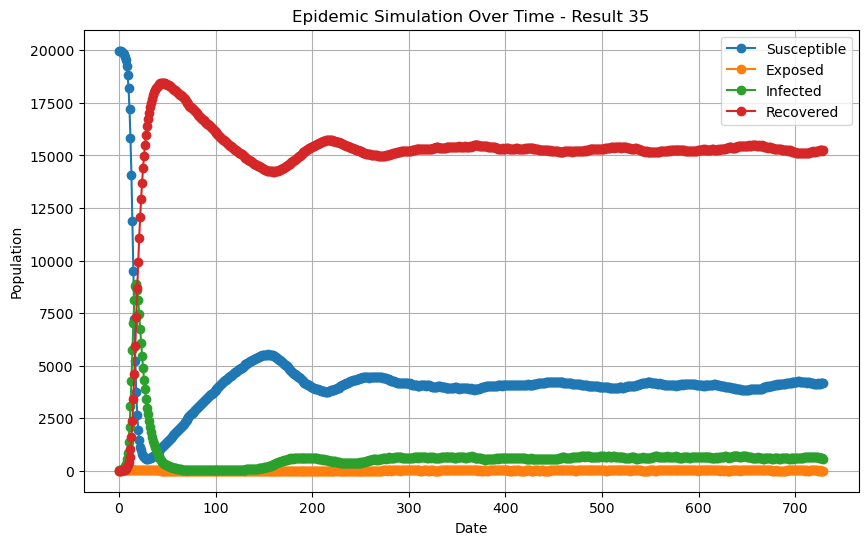

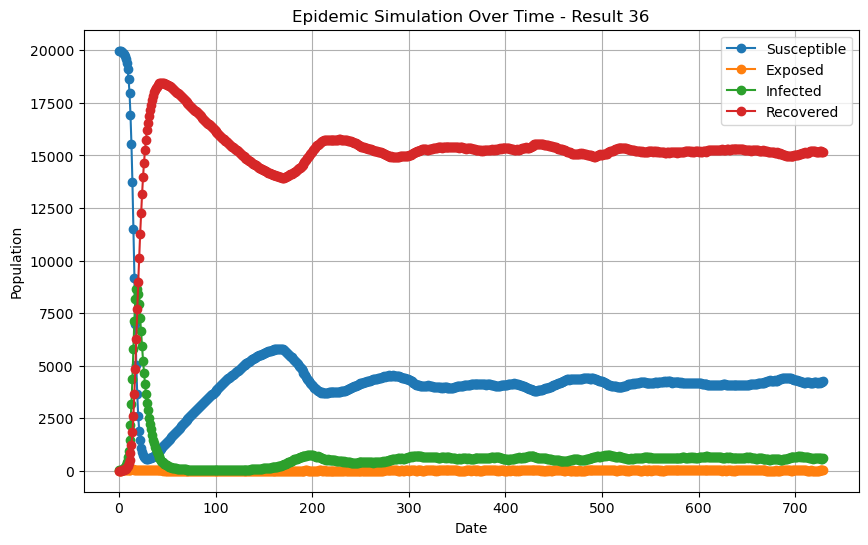

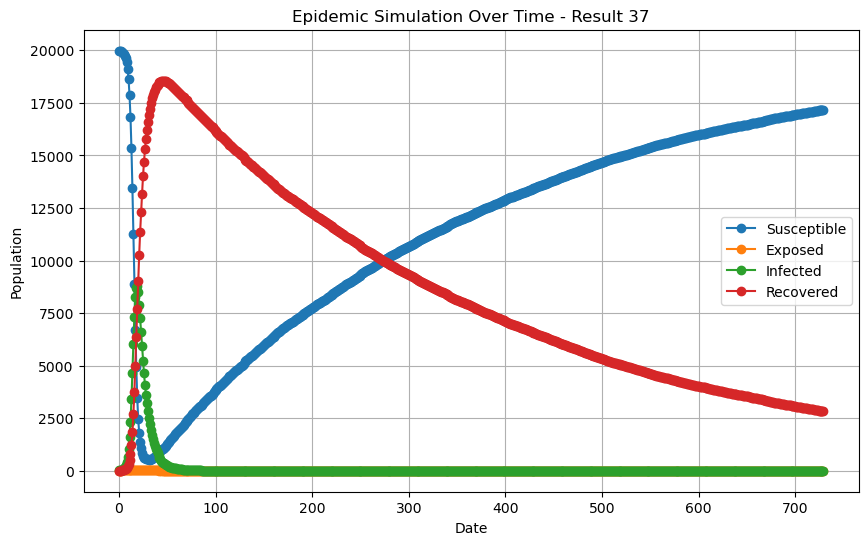

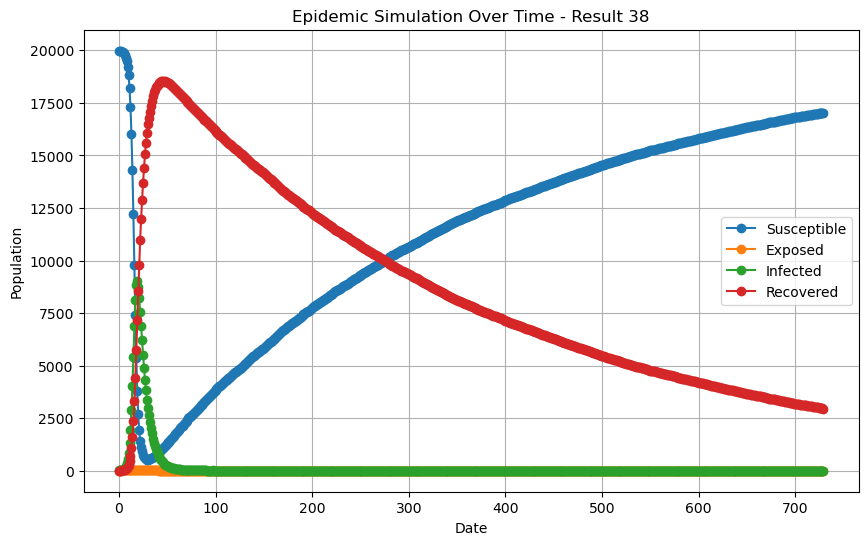

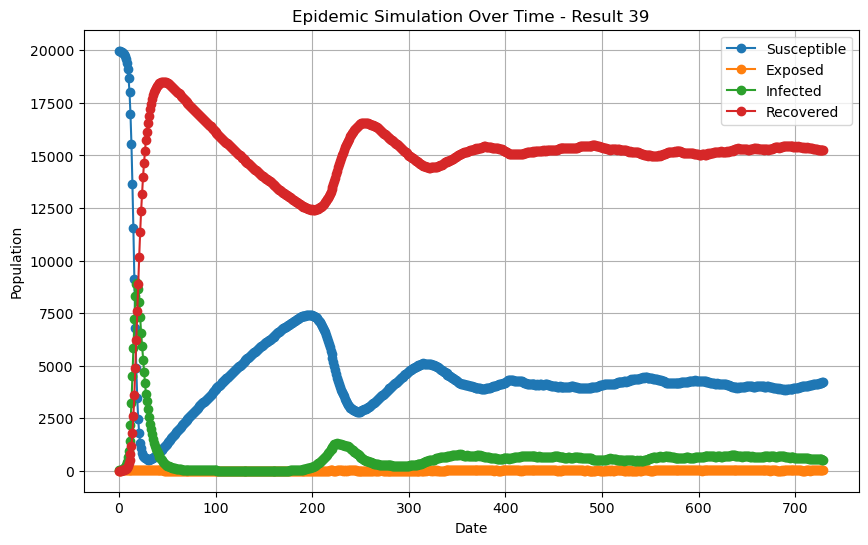

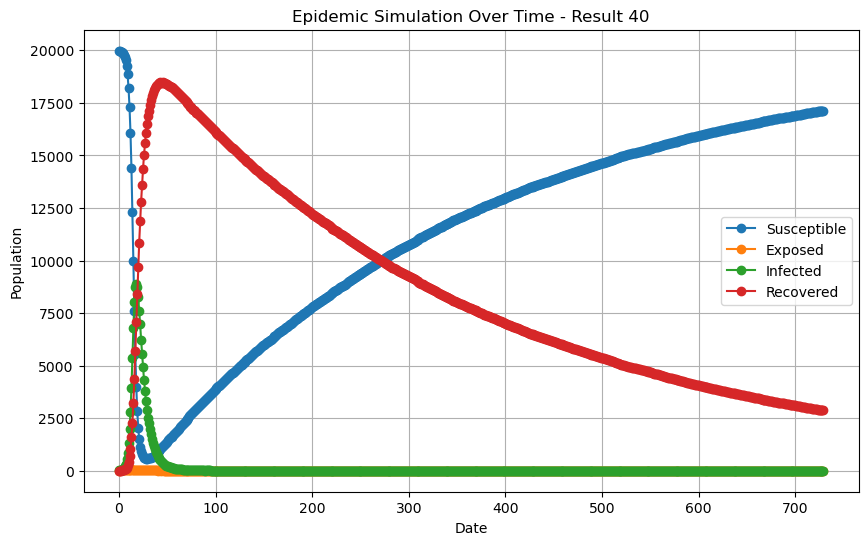

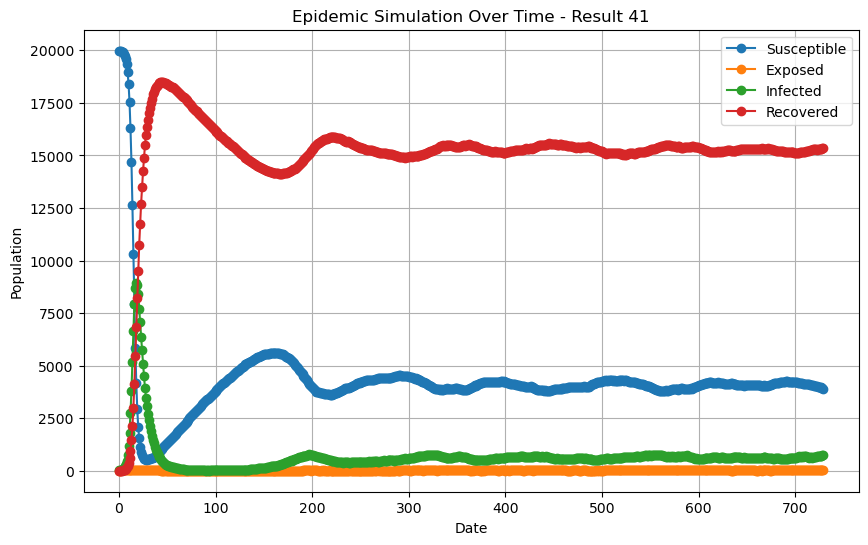

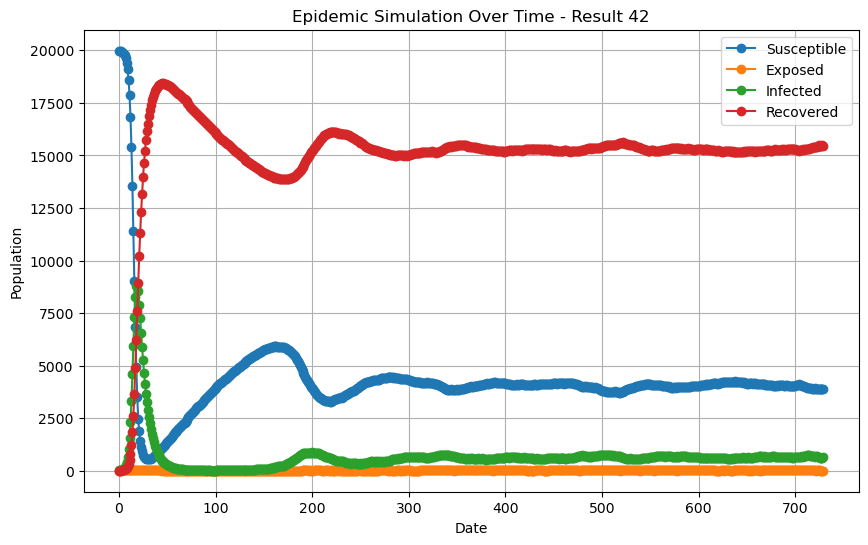

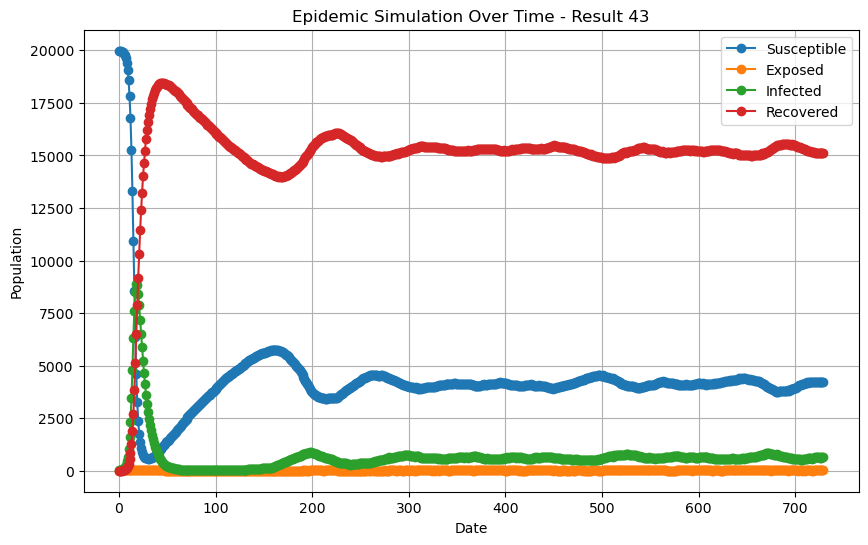

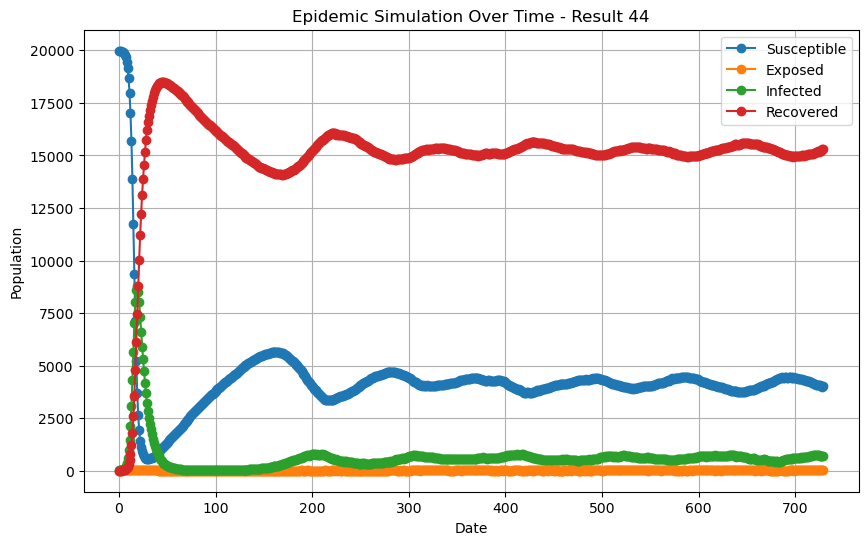

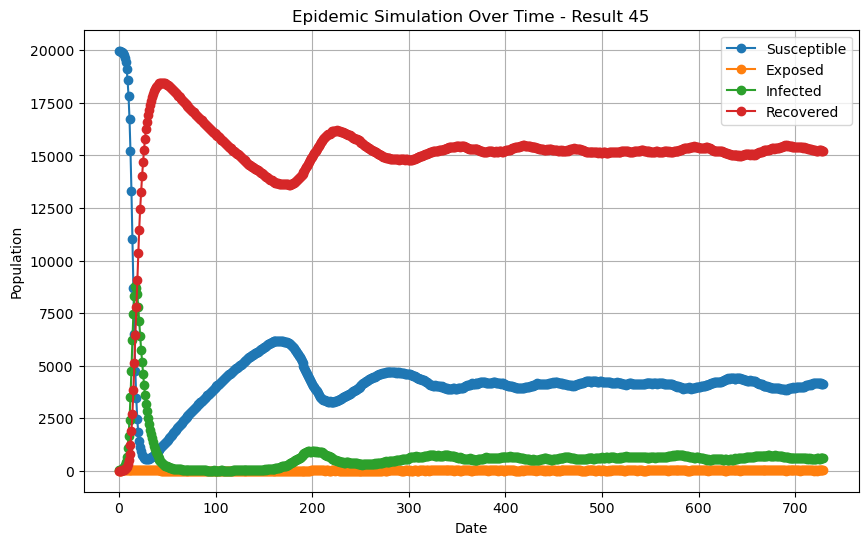

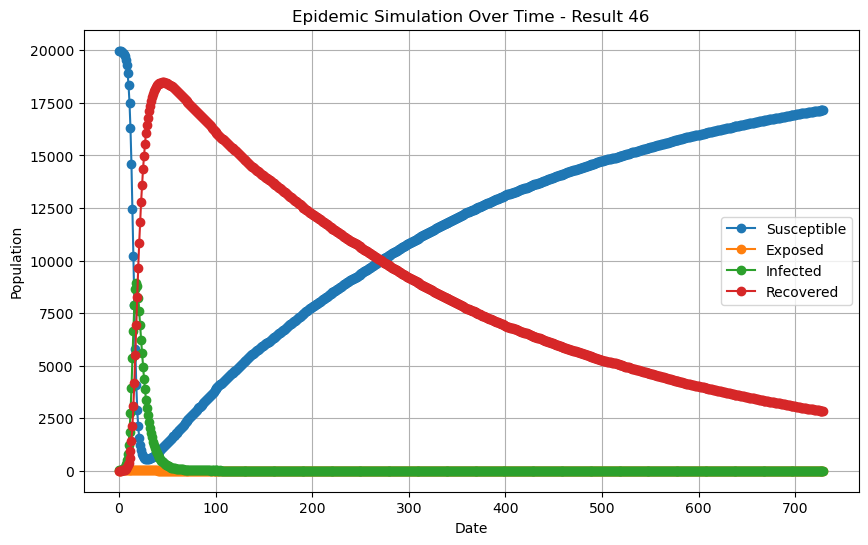

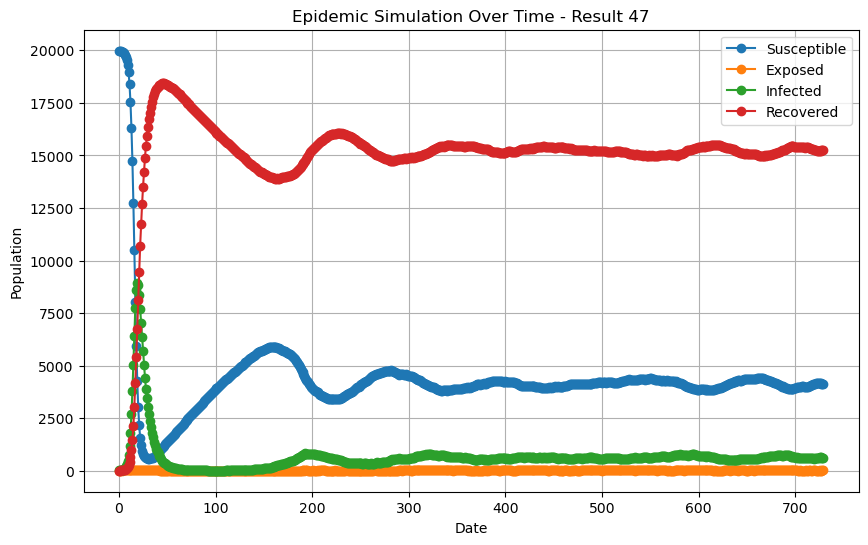

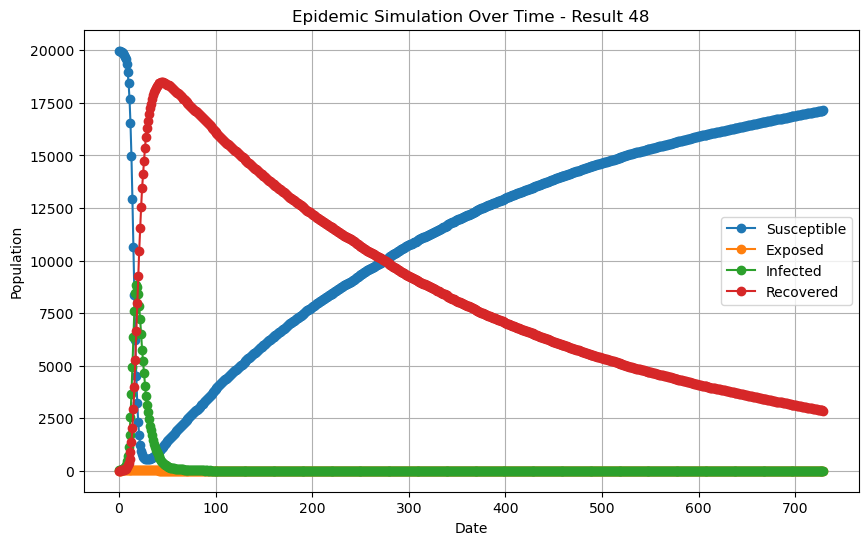

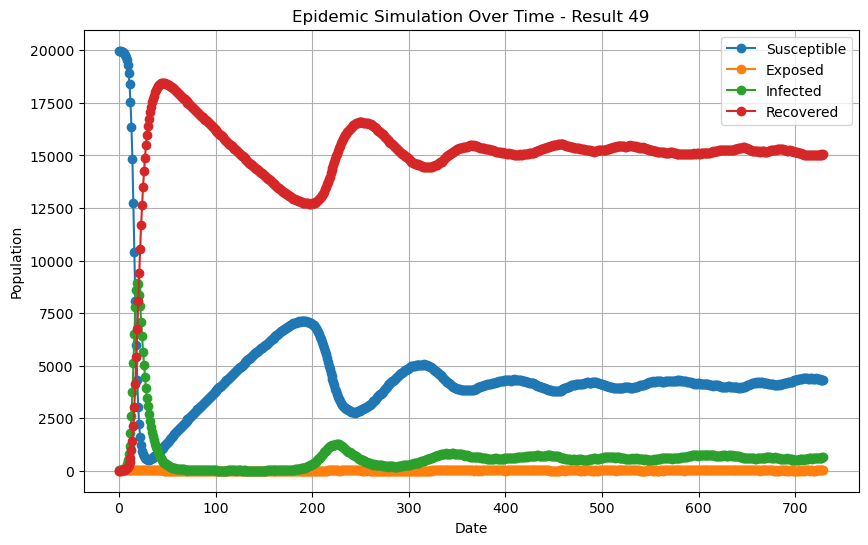

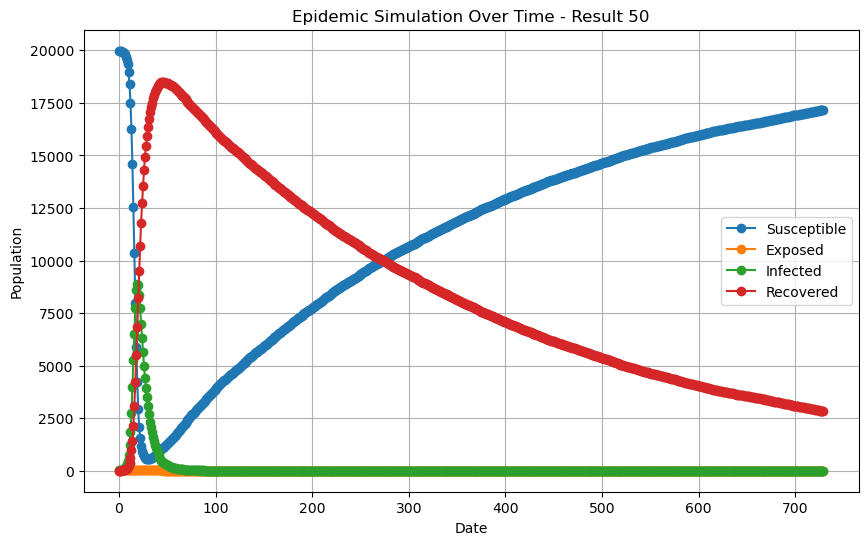

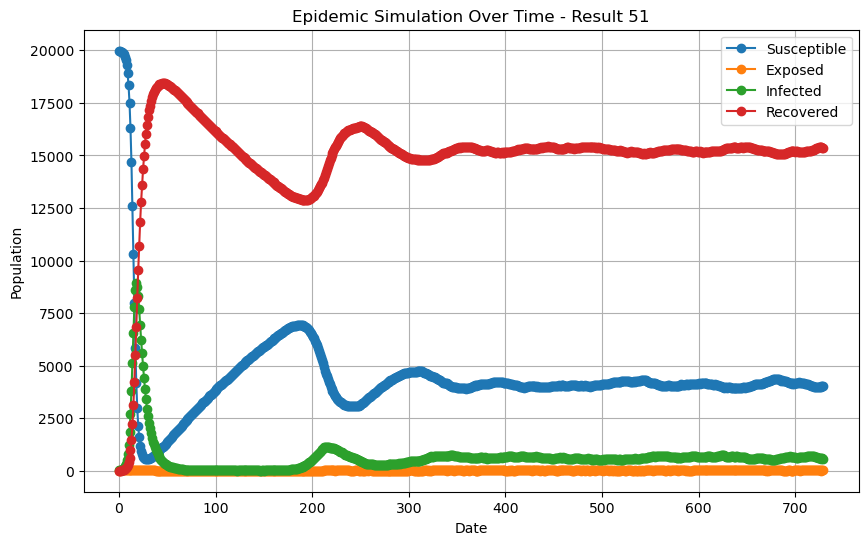

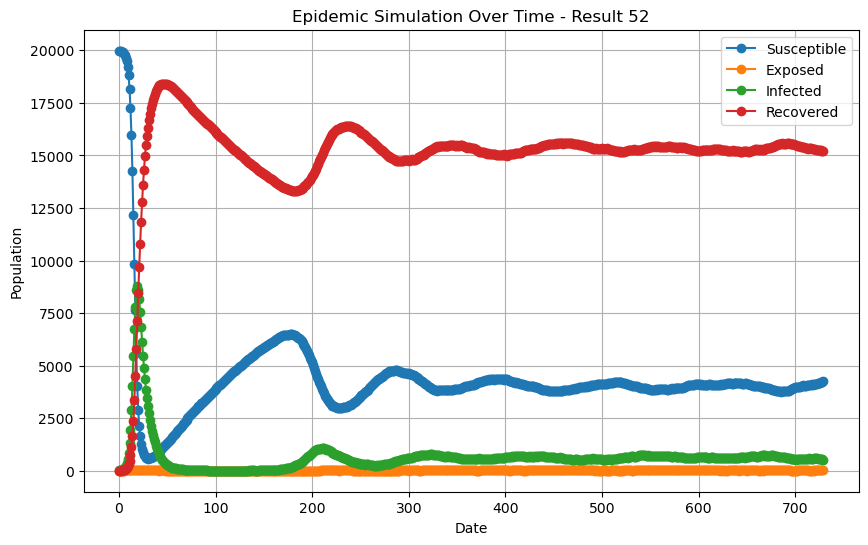

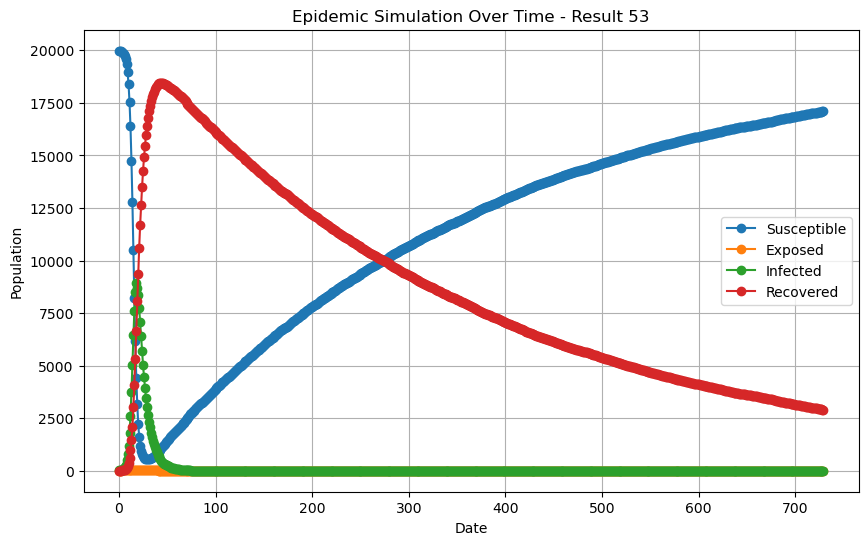

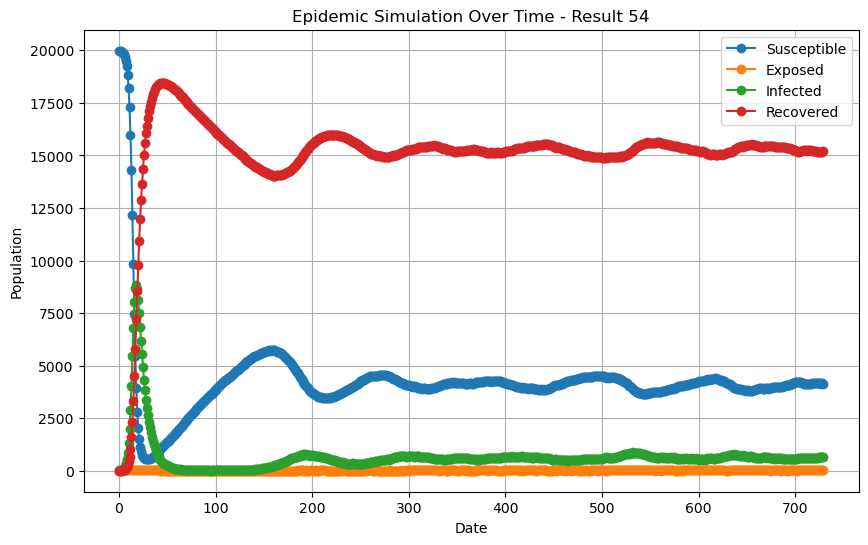

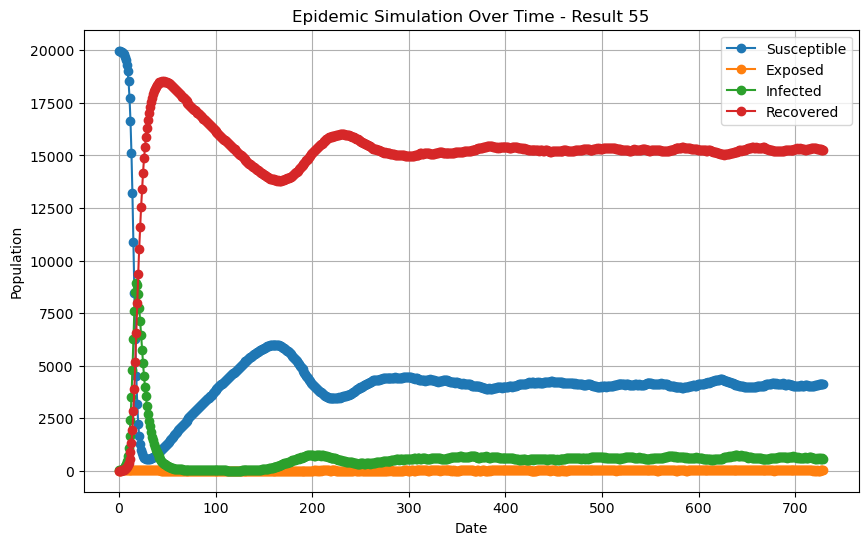

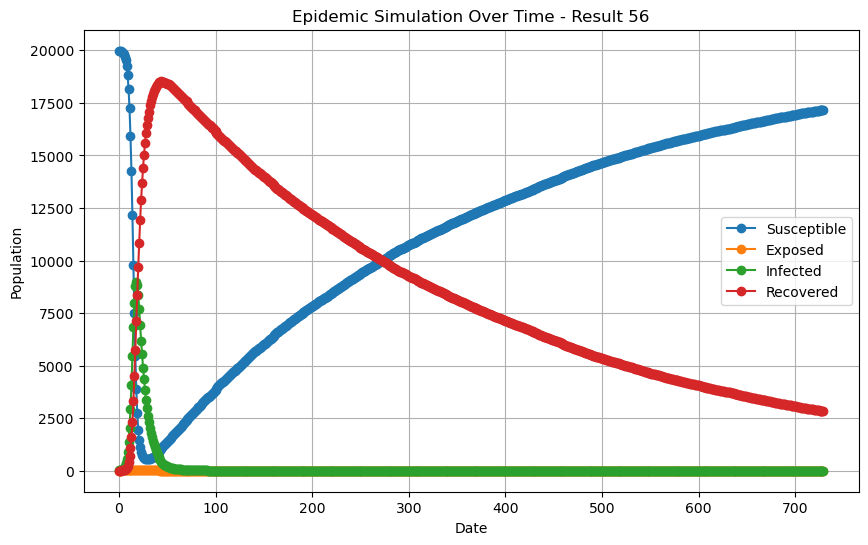

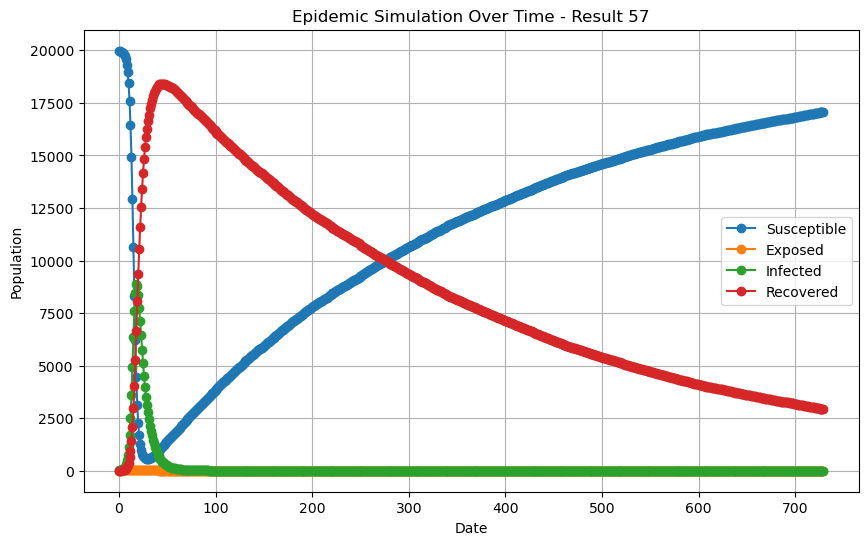

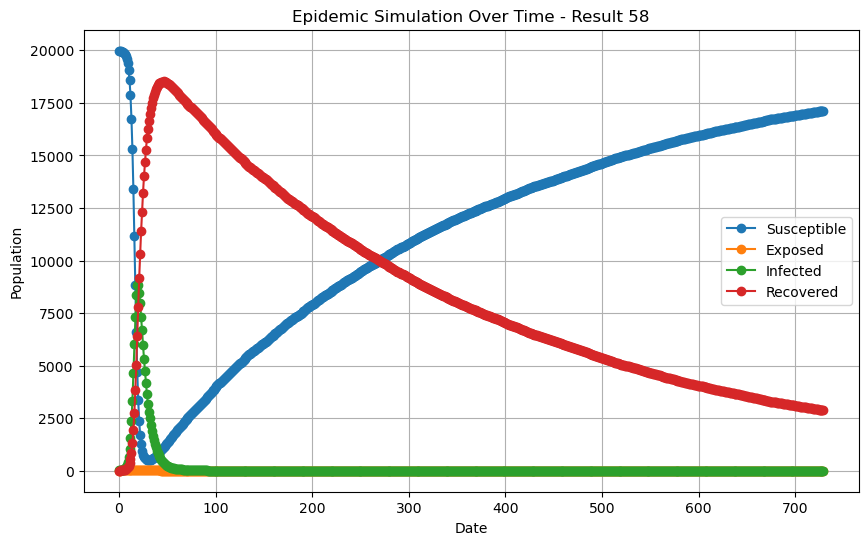

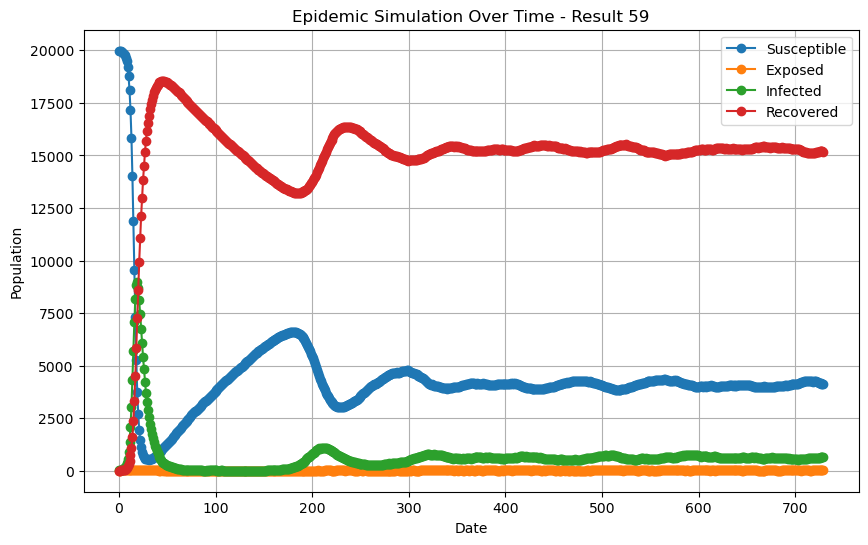

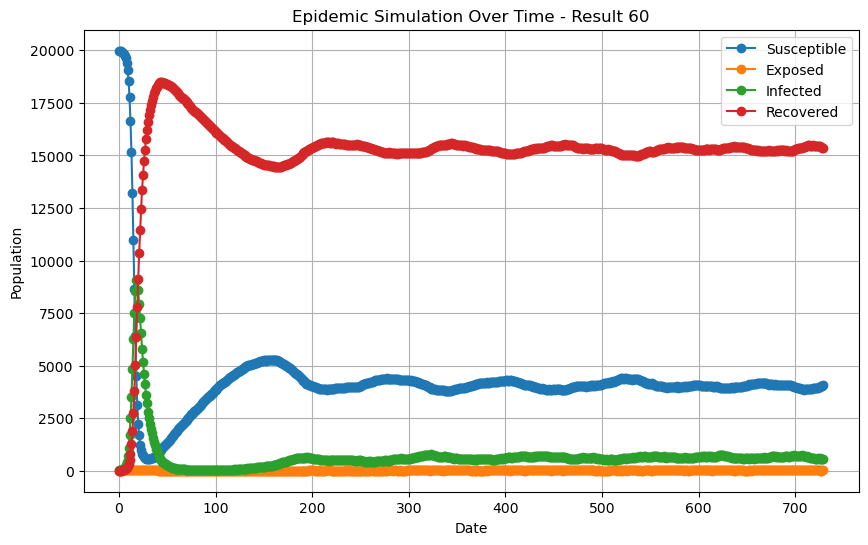

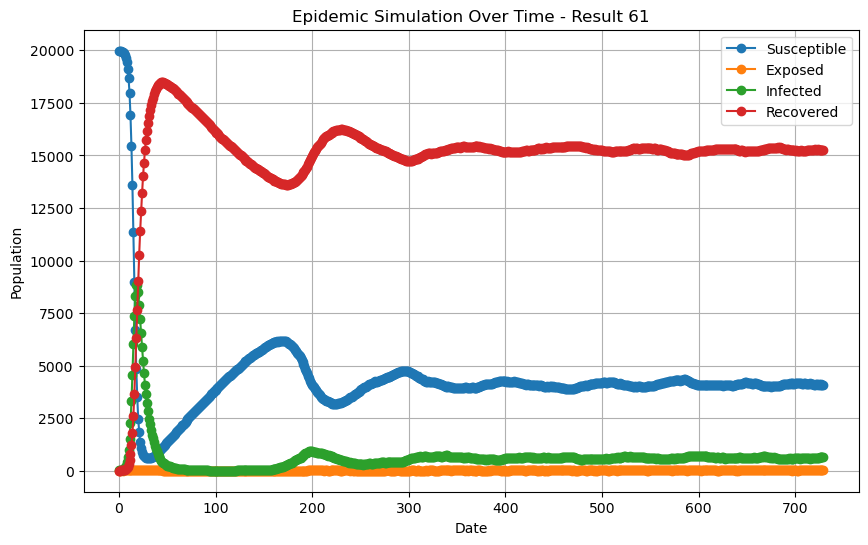

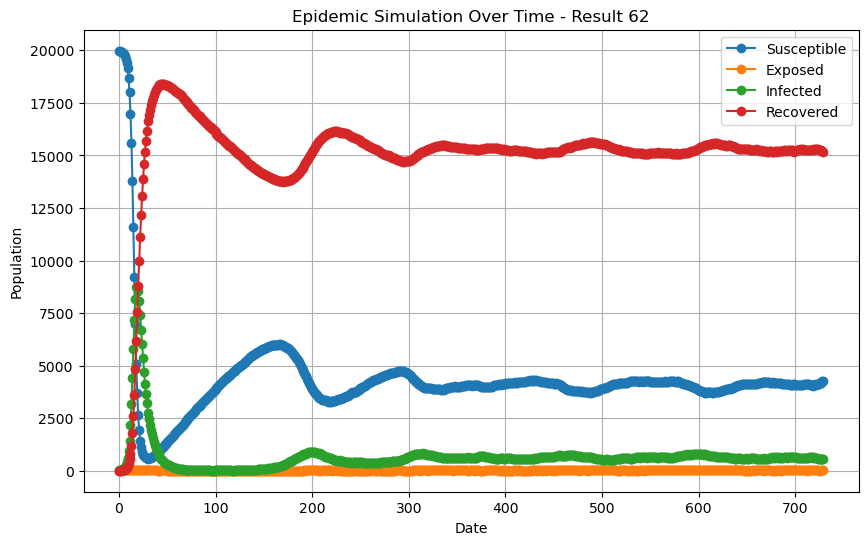

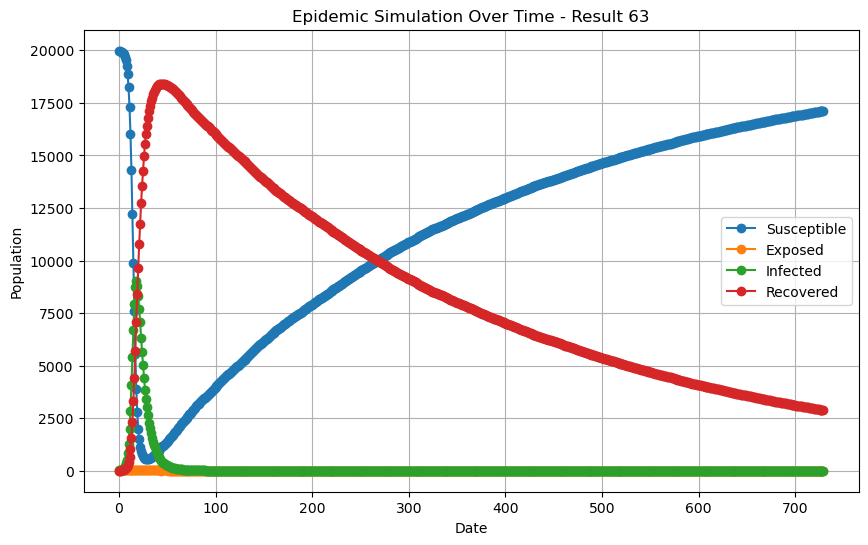

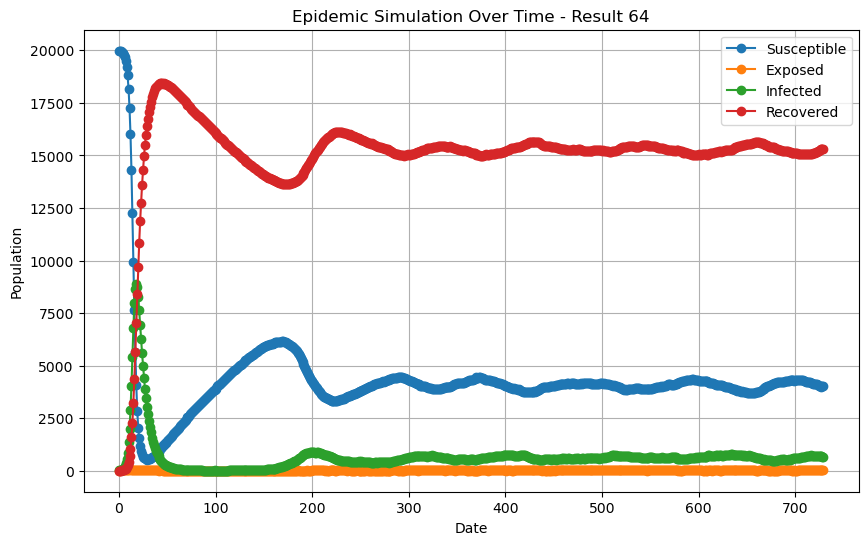

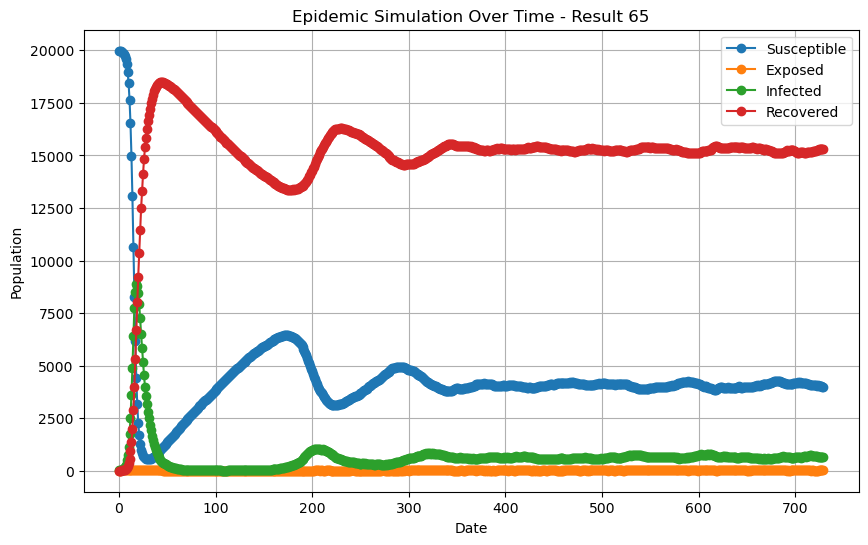

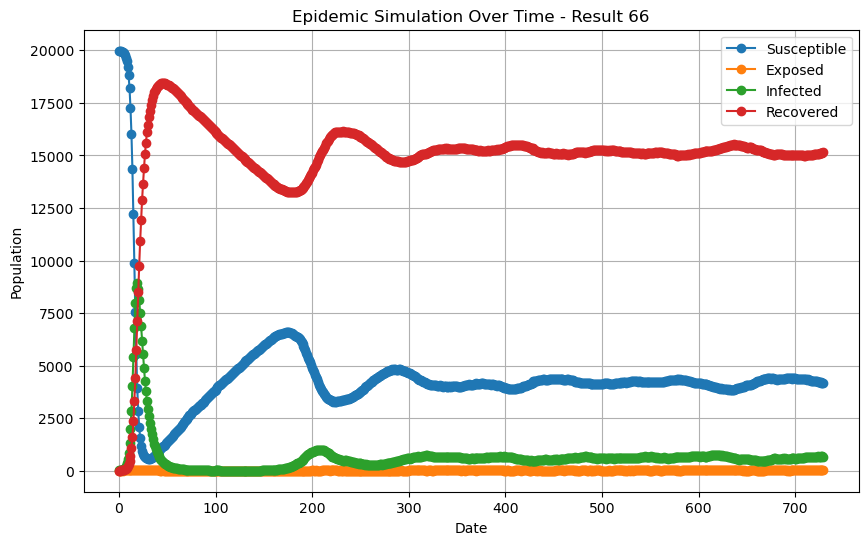

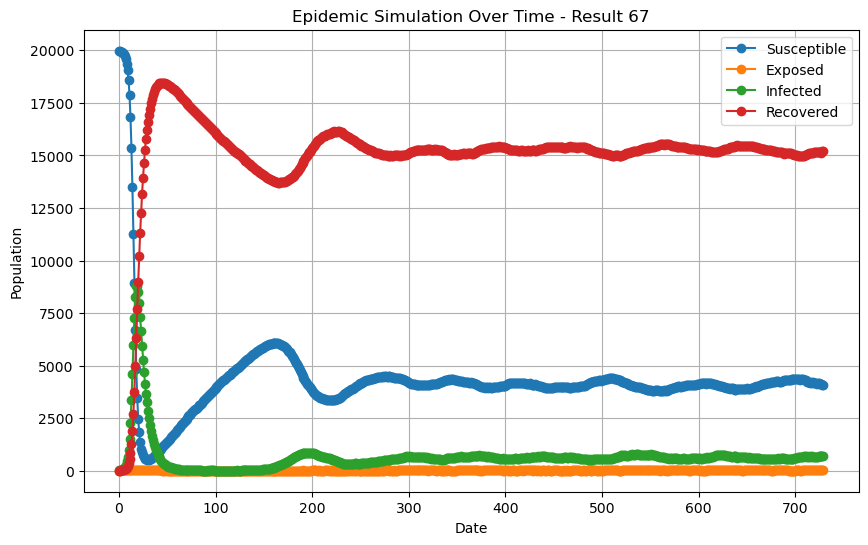

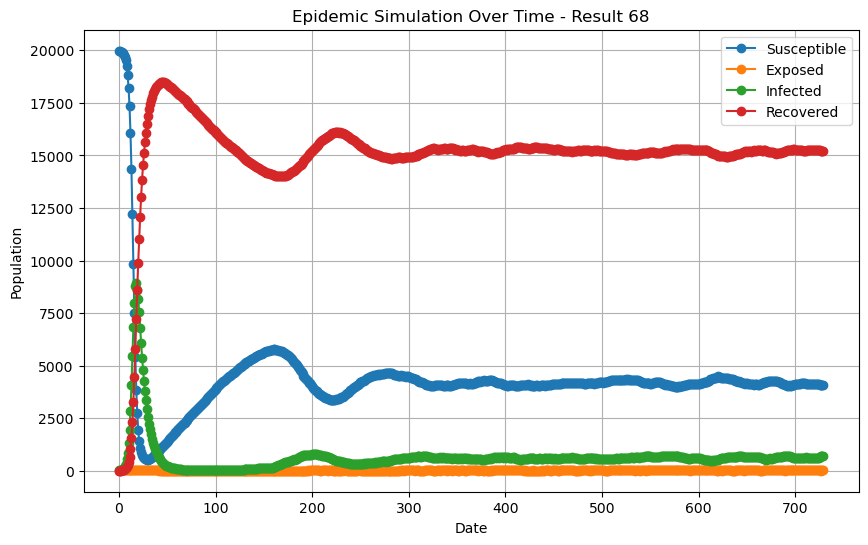

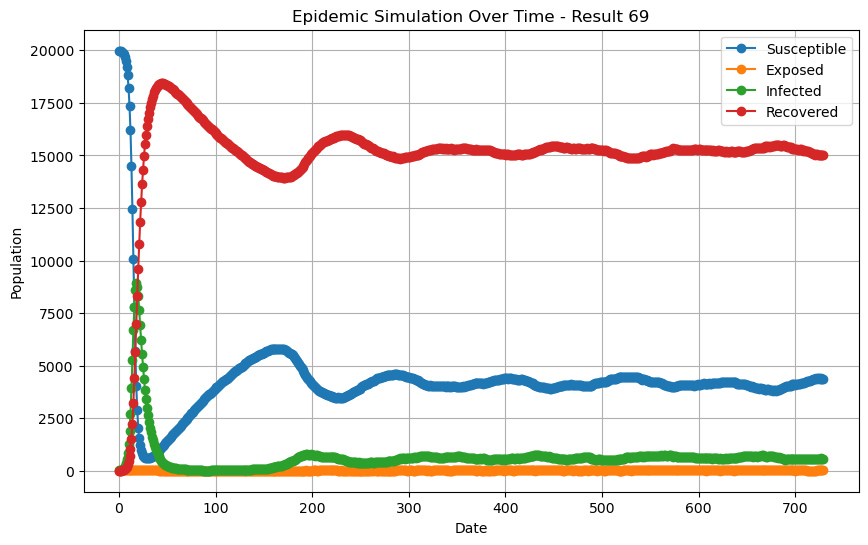

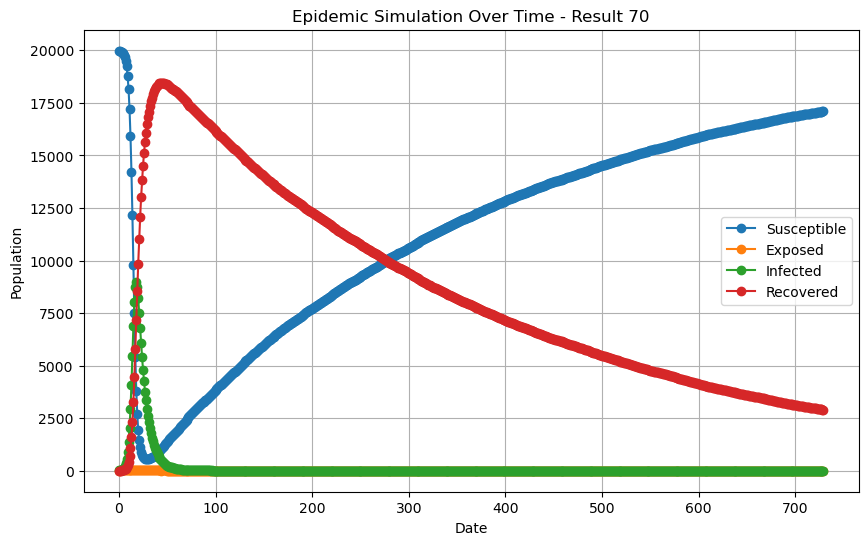

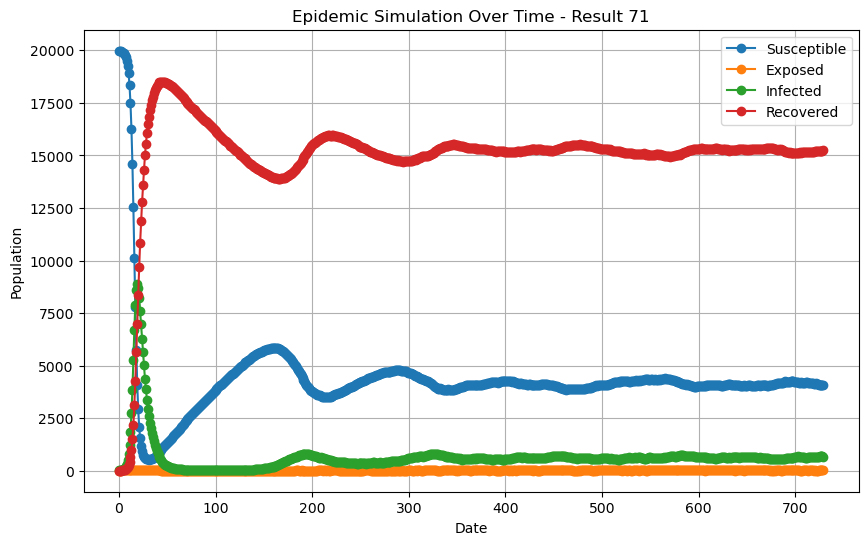

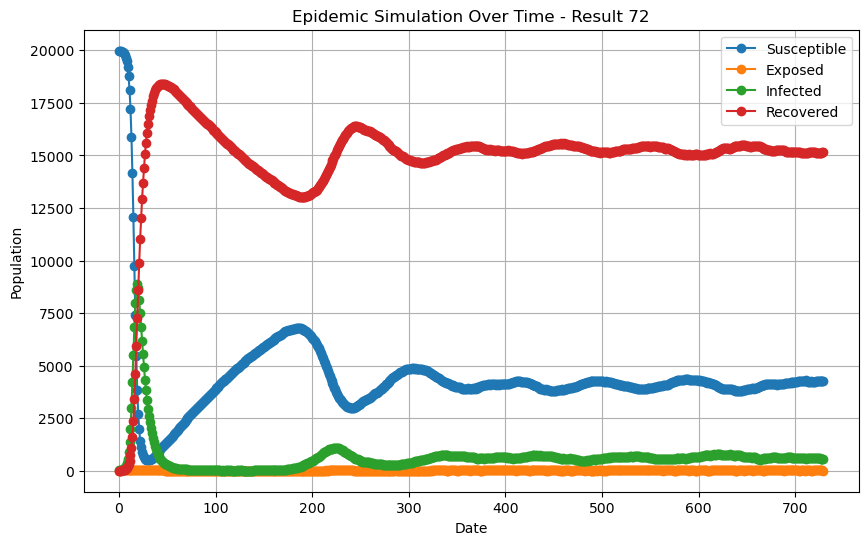

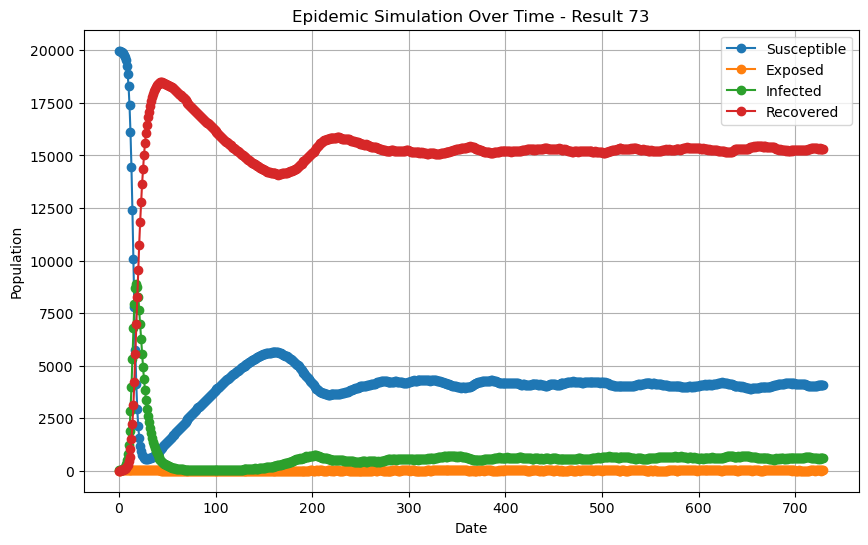

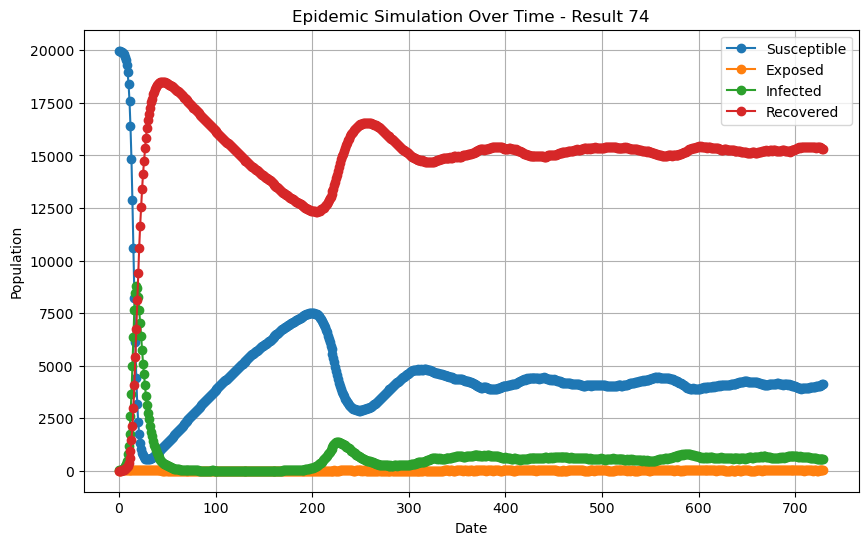

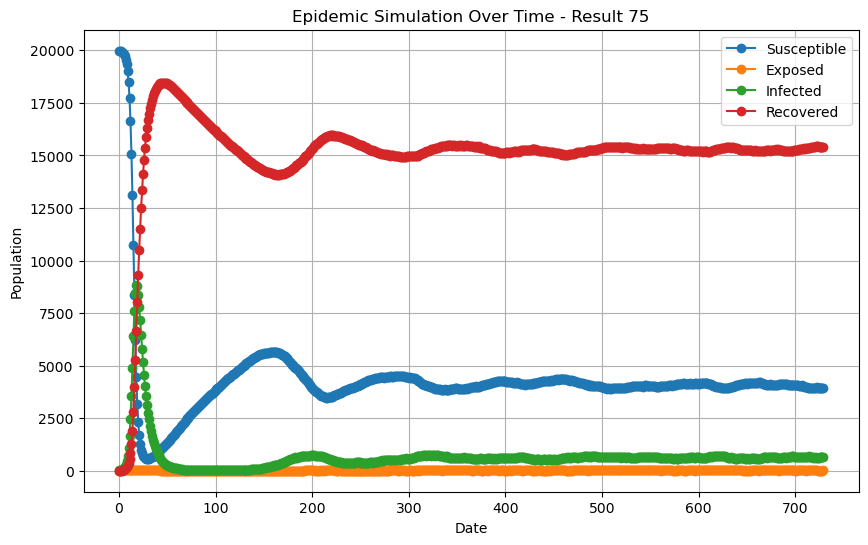

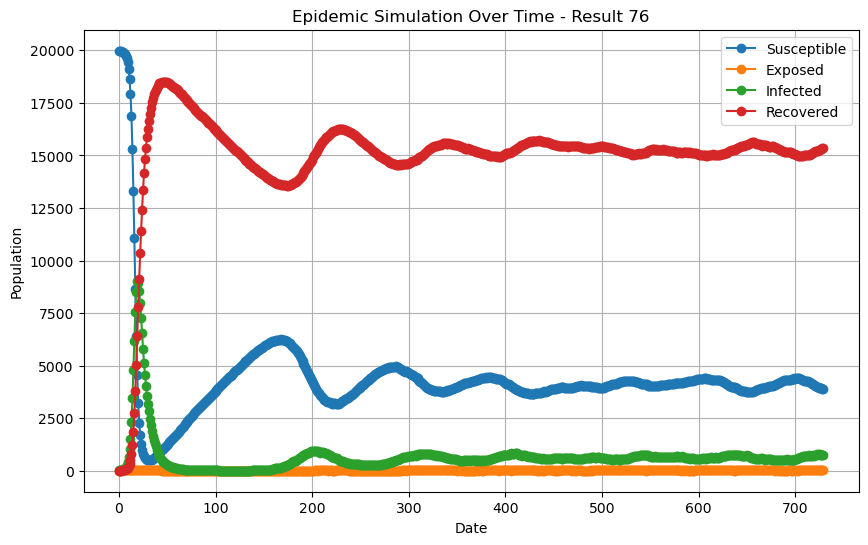

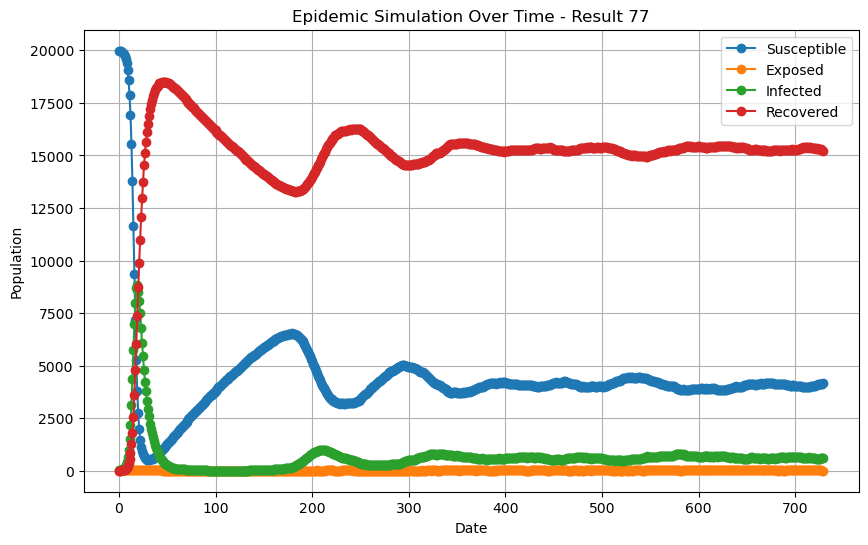

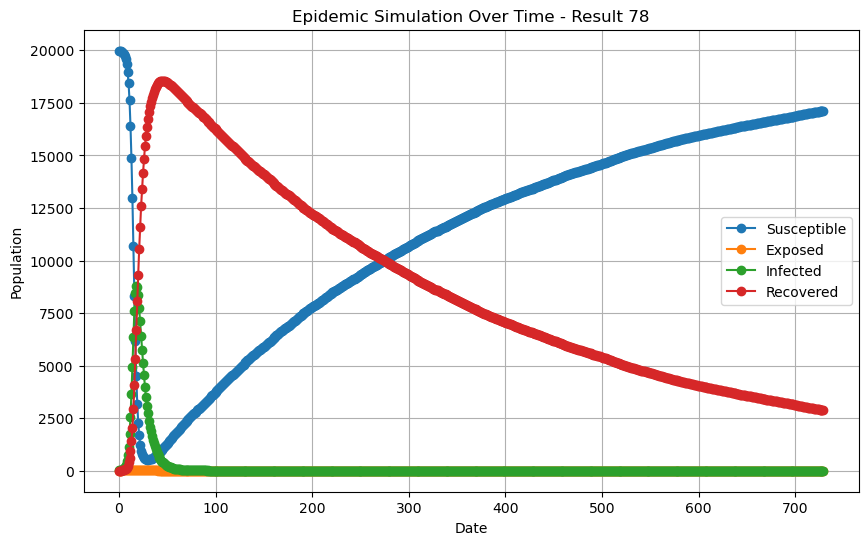

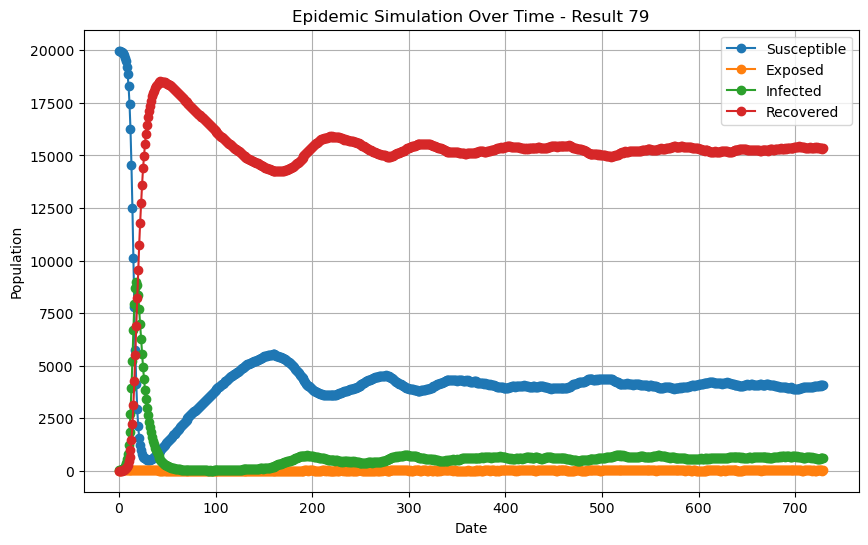

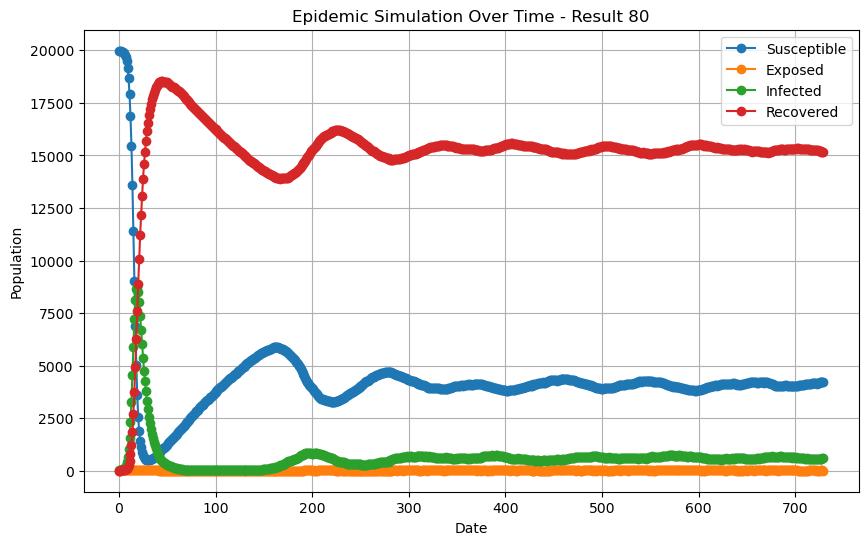

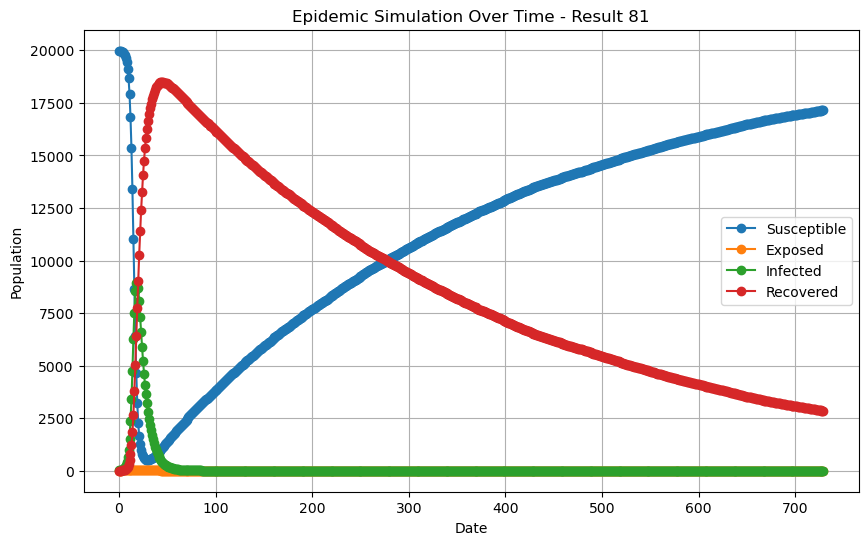

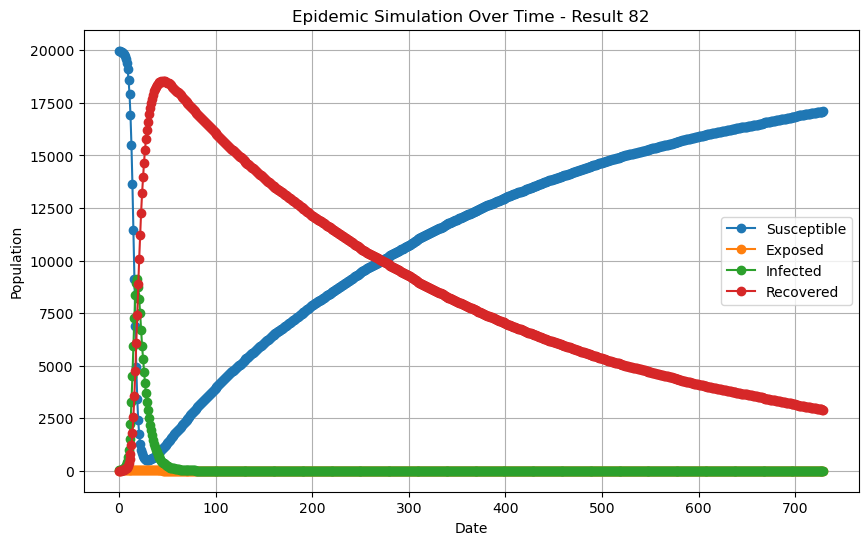

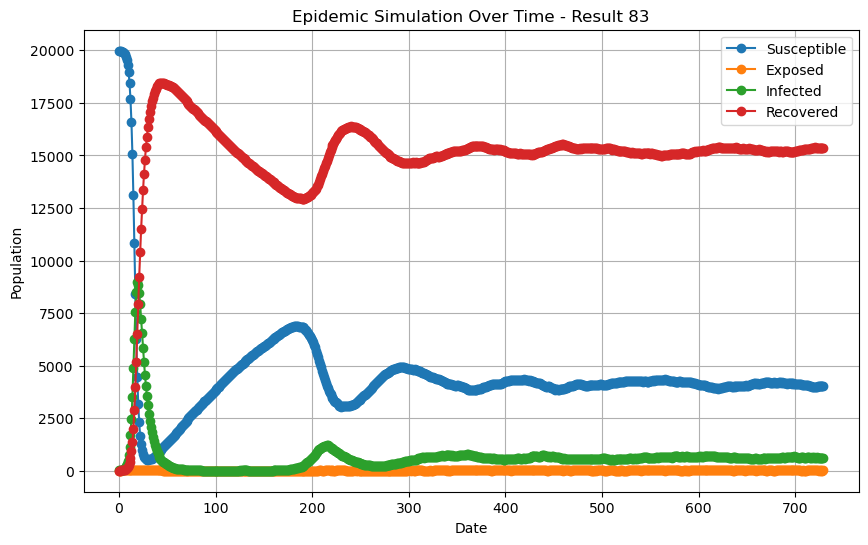

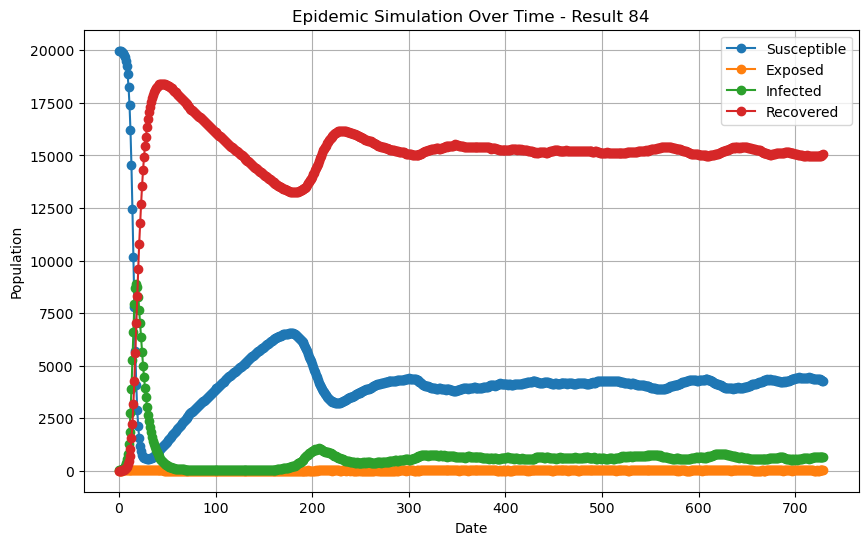

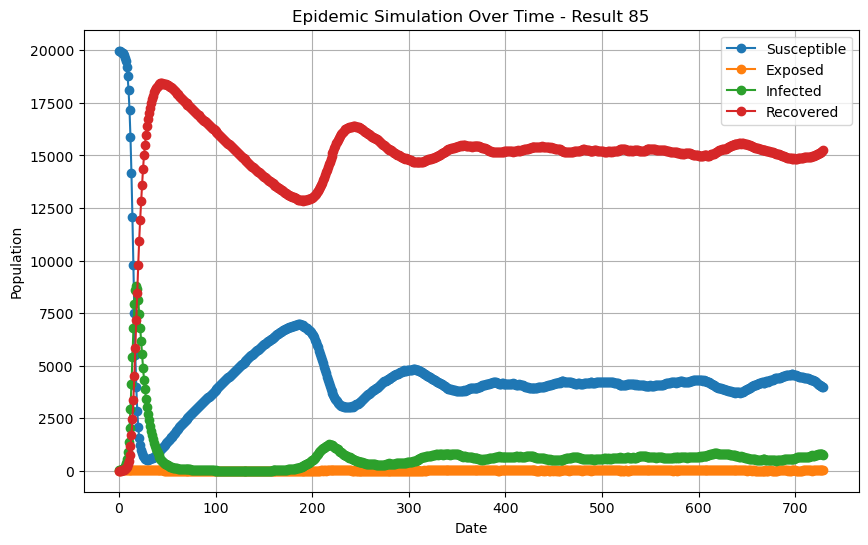

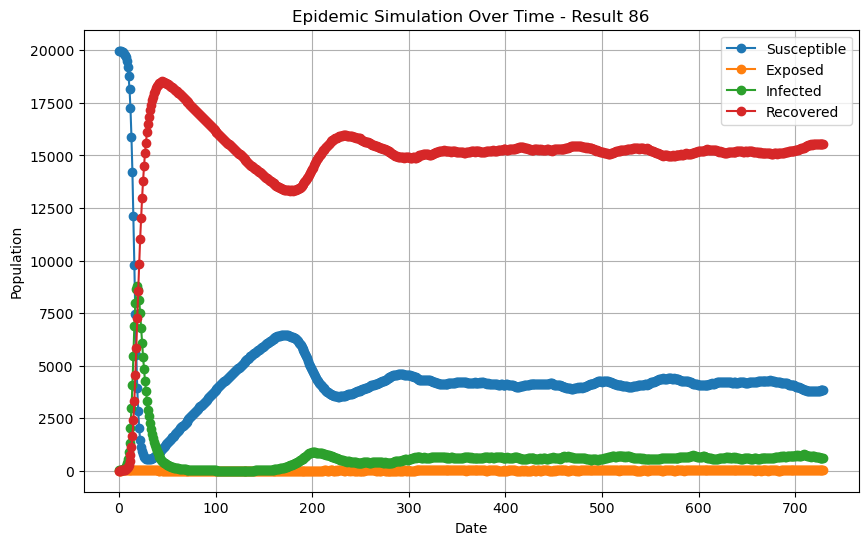

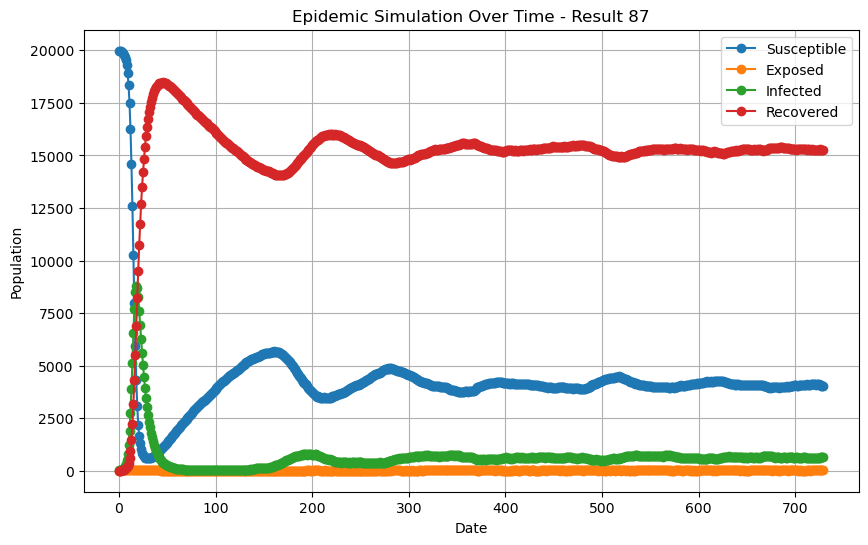

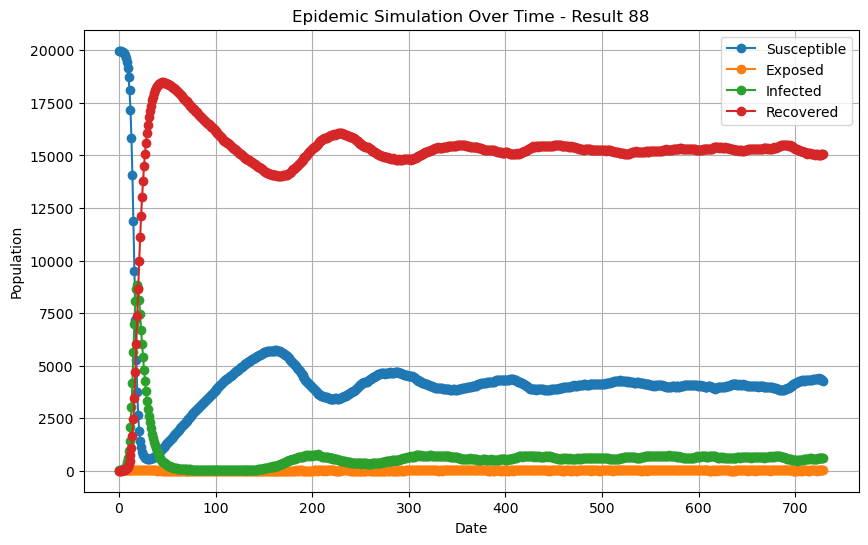

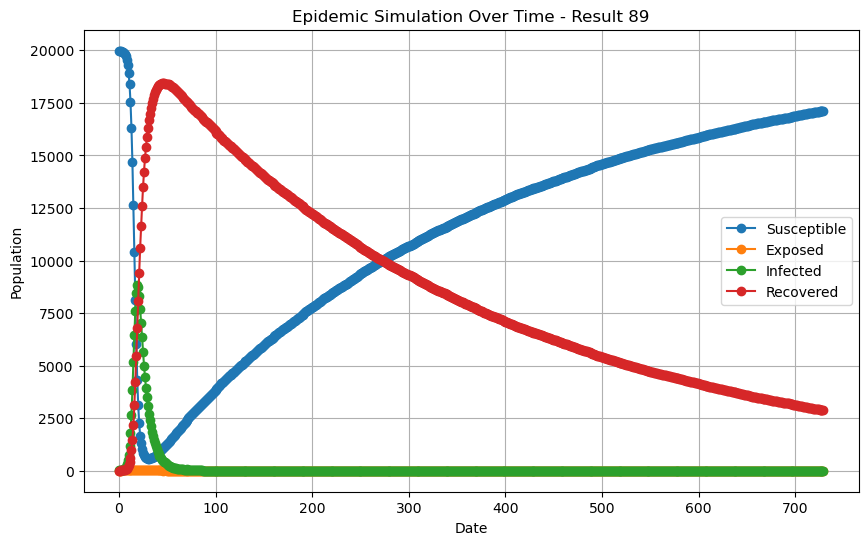

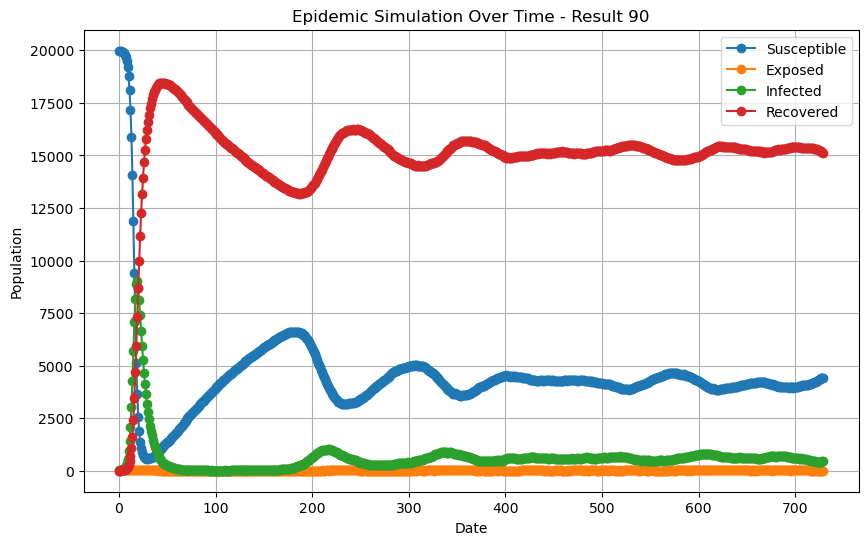

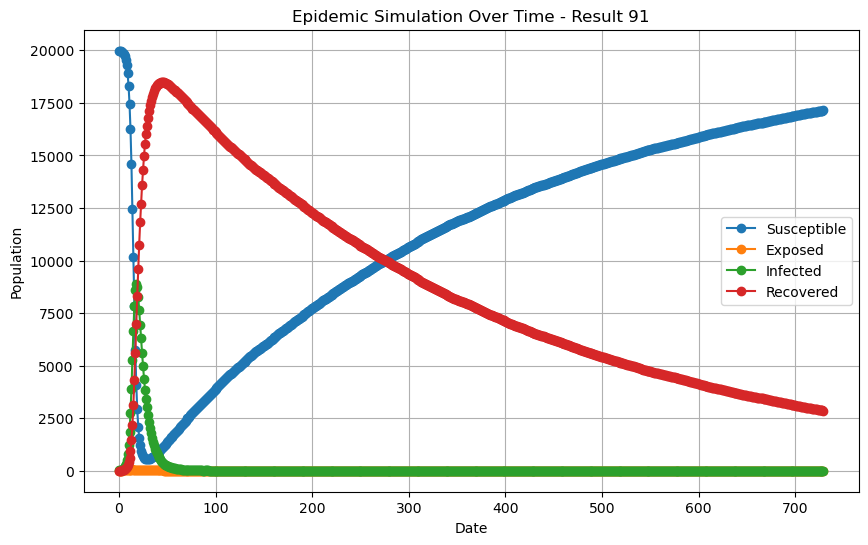

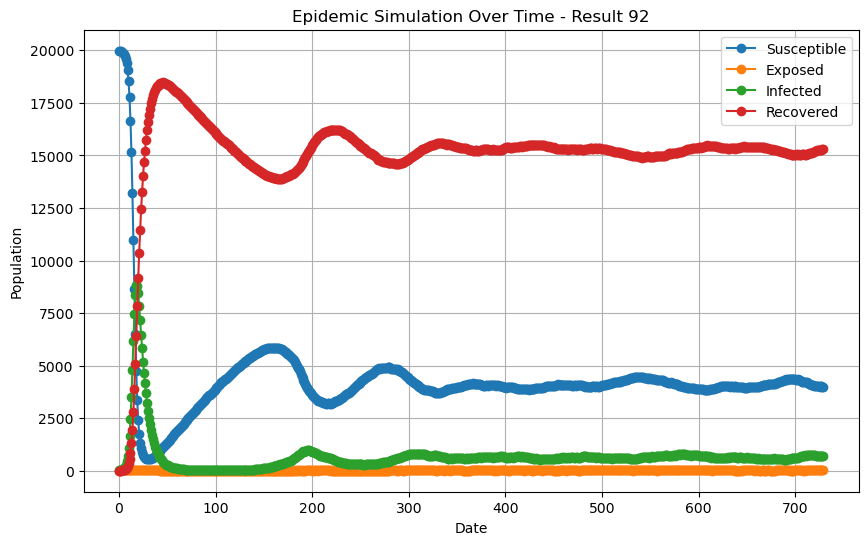

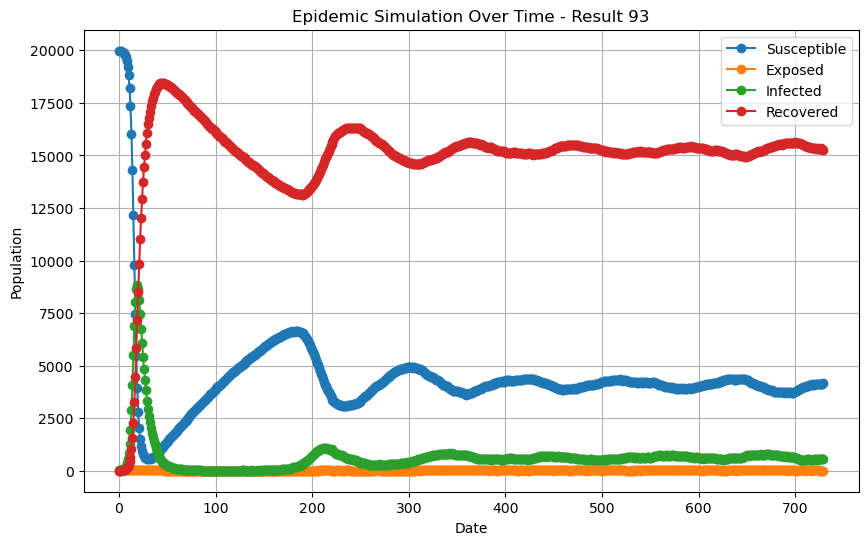

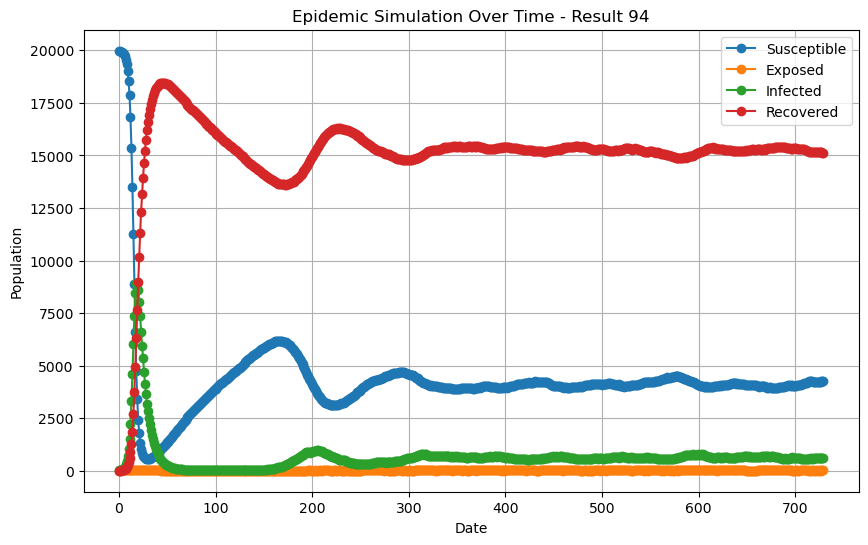

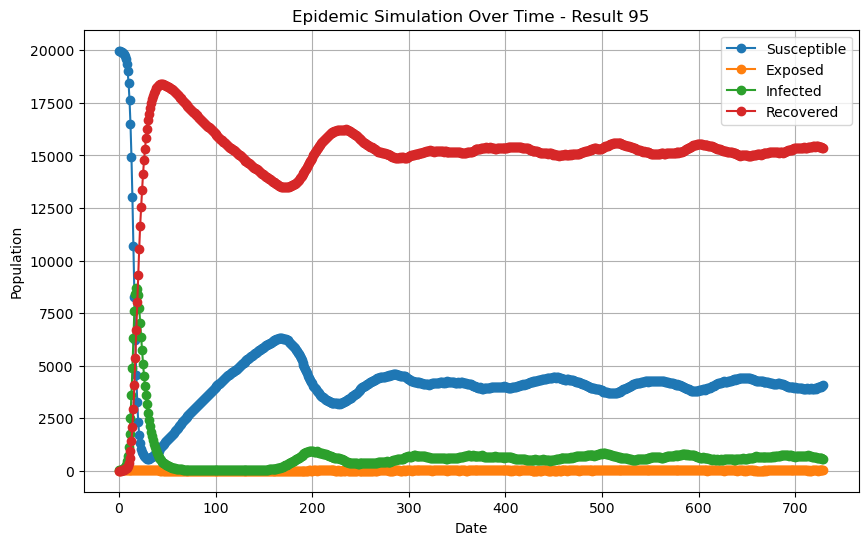

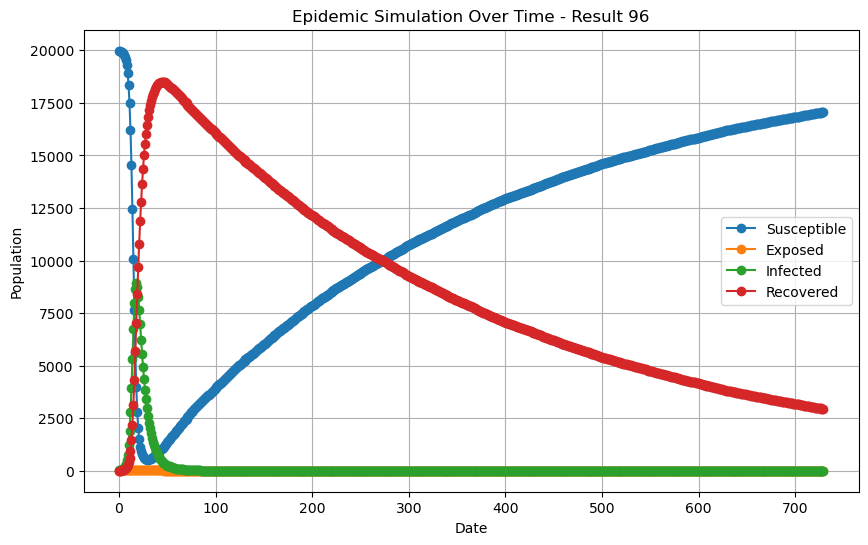

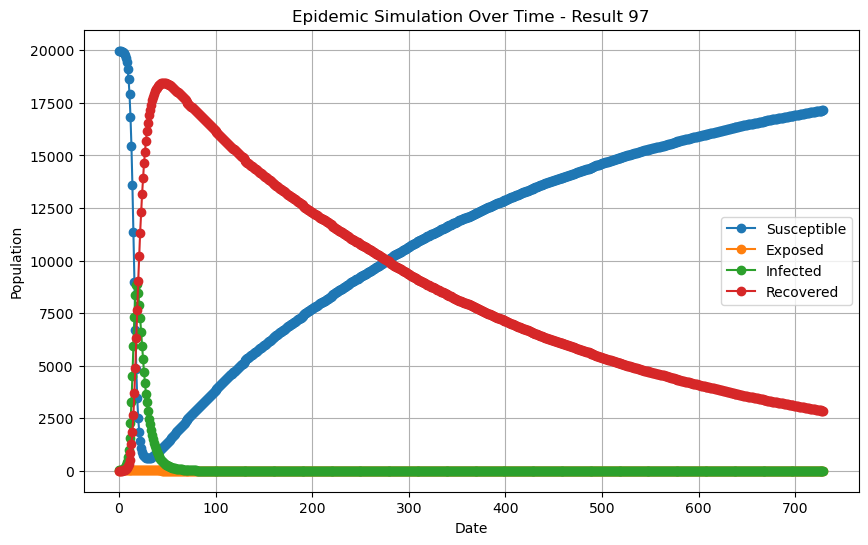

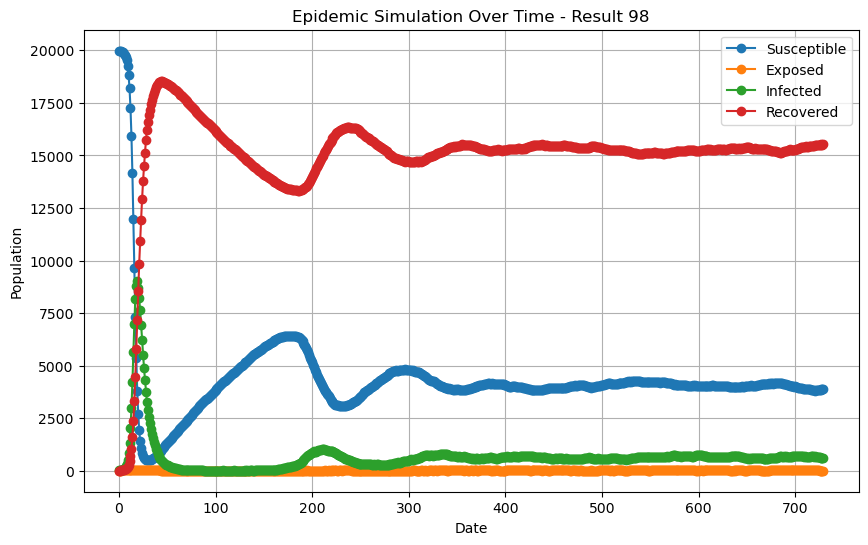

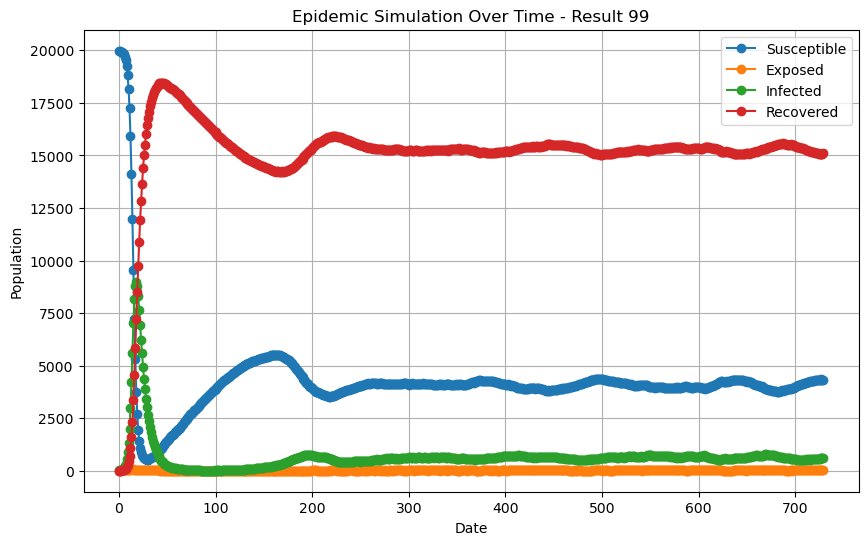

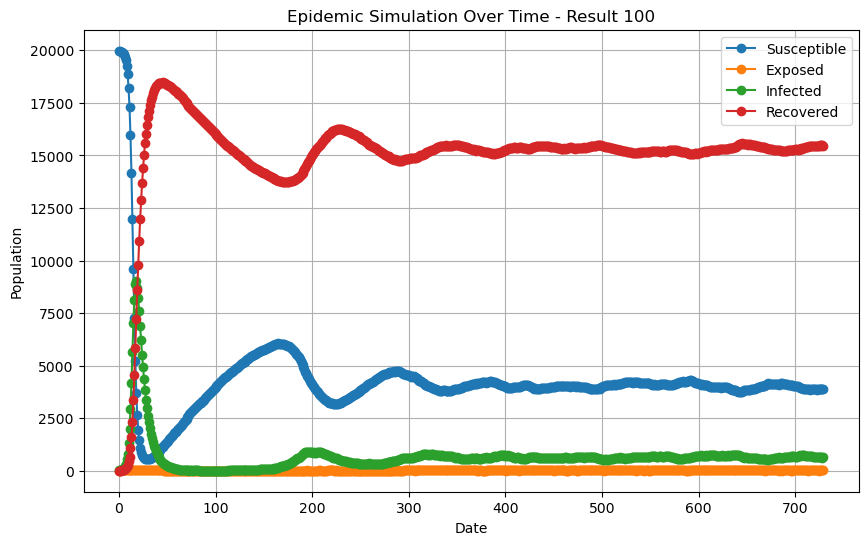

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Display 100 results
for i in range(1, 101):
    file_path = f'../resultat/11_octobre_contamination&deplacer/resultat_{i}.csv'
    data = pd.read_csv(file_path, delimiter=';')

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Susceptible'], label='Susceptible', marker='o')
    plt.plot(data.index, data['Exposed'], label='Exposed', marker='o')
    plt.plot(data.index, data['Infected'], label='Infected', marker='o')
    plt.plot(data.index, data['Recovered'], label='Recovered', marker='o')

    # Customize the plot
    plt.title(f'Epidemic Simulation Over Time - Result {i}')
    plt.xlabel('Date')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()


Compilation & Execution, et (re)génération des 100 simulations (C++)

In [4]:
import subprocess
import os

encoding = 'unicode_escape'

compile_command = "g++ -Ofast src/*.cpp ./src/betterCPP/*.c* -o bin/main.exe -Wall -Wextra"
execute_command = os.path.abspath('../bin/main.exe')
print(execute_command)
#execute_command = "./bin/main.exe"

print("Compilation might take several secondes")
print("Compiling C++ ... ", end="")
compile_process = subprocess.run(compile_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd='..')

if compile_process.returncode == 0:
    print("Compilation successful !")

    print("")

    print("Executing the program... Take several minutes. (avg ~2s /file, 100 files => 3 mins) ")
    print("Generating files at result/11_octobre_contamination&deplacer...")
    print("Running ... ", end="")
    execute_process = subprocess.run(execute_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd='..')

    print("Output:")
    print(execute_process.stdout.decode(encoding=encoding))

    if execute_process.returncode != 0:
        print("Error during execution:", execute_process.returncode)
        print(execute_process.stderr.decode(encoding=encoding))
else:
    print("Compilation failed:")
    print(compile_process.stderr.decode(encoding=encoding))


d:\TTD\Programmation\C\Console\decouverte\ZZ2\multi-agent\1\TpArchiLogicielle\bin\main.exe
Compilation might take several secondes
Compiling C++ ... Compilation successful !

Executing the programs... Take several minutes. (avg ~2s /file, 100 files => 3 mins) 
Generating files at result/11_octobre_contamination&deplacer...
Running ... 

Générer la moyenne

In [15]:
result = [[0 for _ in range(4)] for _ in range(730)]

count_if_dis_dead = False
nGood = 0

folder = '11_octobre_contamination&deplacer'

for i in range(1, 101):
    res_file = open(f"../resultat/{folder}/resultat_{i}.csv", "r")
    res = res_file.read()
    res_file.close()

    res = res.split("\n")
    res.pop(0)
    try:
        if(count_if_dis_dead or int(res[700].split(";")[2]) != 0):
            nGood += 1
            for j in range(730):
                res[j] = res[j].split(";")
                
                for k in range(4):
                    result[j][k] += int(res[j][k])
    except:
        print(f"Erreur fichier {i} ligne {j}!")

scv = "Susceptible;Exposed;Infected;Recovered\n"
for i in range(1, 730):
    scv += f"{result[i][0]/nGood};{result[i][1]/nGood};{result[i][2]/nGood};{result[i][3]/nGood}\n"

print(f"Pourcentage de fichier valide (où la maladie ne s'arrete pas brutalement): {nGood}%")

p = f"../resultat/{folder}/resultat_mean.csv"
file_res = open(p, "w")
file_res.write(scv.replace(",", "."))
print("fichier", p, "généré avec succès")

Pourcentage de fichier valide (où la maladie ne s'arrete pas brutalement): 68%
fichier ../resultat/11_octobre_contamination&deplacer/resultat_mean.csv généré avec succès


Voir la moyenne

Reading of file ../resultat/11_octobre_contamination&deplacer/resultat_mean.csv


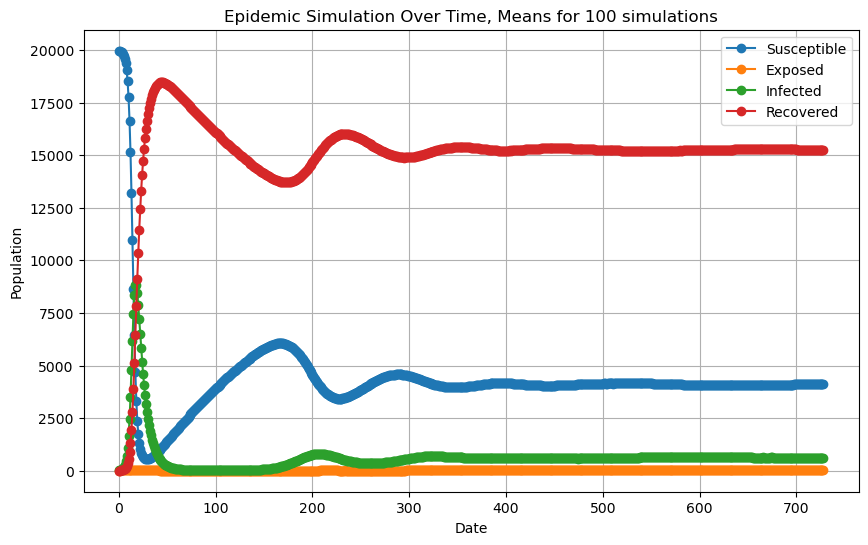

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read data from the 'result' file
folder = '11_octobre_contamination&deplacer'
p = f'../resultat/{folder}/resultat_mean.csv'
data = pd.read_csv(p, delimiter=';')
print("Reading of file", p)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Susceptible'], label='Susceptible', marker='o')
plt.plot(data.index, data['Exposed'], label='Exposed', marker='o')
plt.plot(data.index, data['Infected'], label='Infected', marker='o')
plt.plot(data.index, data['Recovered'], label='Recovered', marker='o')

# Customize the plot
plt.title('Epidemic Simulation Over Time, Means for 100 simulations')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


Et voilà :\)